## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Resumo</p></div>

### Problema de Negócio

*"...O time de produtos tem dificuldade em determinar a necessidade da maioria dos clientes. O time de marketing enfrenta desafios para determinar o cliente ideal e o time de desenvolvimento sofre com os grandes volumes de acessos no site e em seu aplicativo, causando quedas de sistema e tornando o site inoperante por algumas horas, impedindo as pessoas de comprar e assim, gerando muitas reclamações no atendimento, liderado pelo time de customer experience."*

"... Porém, a dificuldade inicial era identificar quais clientes teriam um nível de satisfação “Satisfeito” ou “Neutro/Insatisfeito”, para que o time conseguisse entrar em contato somente com os clientes “Neutro/Insatisfeito”.


### Objetivo

- Identificar os clientes satisfeitos/insatisfeitos dentro do escopo de atuação de um cientista de dados
- Gerar insights através dos dados para os times impactados

### Como o Cientista de Dados pode ajudar na resolução

- O Cientista de Dados através do conhecimento do negócio, analises estatisticas, aplicação do metodo cientifico na modelagem dos experimento e na cosntrução de modelos de aprendizado de máquina é um profissional que consegue reunir as informações relevantes sobre os clientes e identificar padrões, tendências e possíveis relações entre as variáveis.


### Como a solução proposta impacta o negocio

- <u>Melhoria da satisfação do cliente:</u> Ao identificar os clientes insatisfeitos ou neutros, o time de atendimento poderá entrar em contato com eles de forma personalizada para entender suas preocupações e buscar soluções. Isso pode levar a um aumento da satisfação do cliente, reduzindo as reclamações e melhorando a imagem da empresa.

- <u>Aumento da retenção de clientes:</u> Com o modelo de satisfação, a empresa pode tomar medidas proativas para resolver os problemas dos clientes insatisfeitos antes que eles se tornem um problema maior e optem por não voltar a fazer negócios. Isso pode aumentar a retenção de clientes, aumentando a fidelidade e o valor do ciclo de vida do cliente.

- <u>Direcionamento eficiente de marketing:</u> O modelo que determina o cliente ideal pode ajudar o time de marketing a direcionar suas campanhas de forma mais eficiente, concentrando-se nos públicos mais propensos a se tornarem clientes satisfeitos e fiéis. Isso pode melhorar a taxa de conversão de leads em clientes e otimizar os gastos com marketing.

- <u>Redução de custo :</u> com uma identificaçao otimizada dos clientes insatisfeitos / neutros, a empresa consegue reduzir os custos operacionais para entrar em contato com os clientes (atendimento ao consumidor), oferecimento de bônus ou promoções específicas para converter esses clientes. Esses recursos podem ser redirecionados para outras áreas a fim de diminuir parte dos problemas citados no enunciado.


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Imports</p></div>

In [4]:
# Basic Tools
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from watermark import watermark 
from summarytools import dfSummary
from IPython.display import HTML
import plotly

# Imputer
from sklearn.impute import KNNImputer
from math import ceil

# Modelos de Machine Learning
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Model Selection Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate, StratifiedKFold

# Model Evaluation Tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer

# HyperTunning Tools
import optuna

# Feature Importance Tools
import shap
from shap import plots

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Helper Funcitions</p></div>

In [5]:
def PREPROCESSING(df,verbose=True):
    """
    Realiza o pré-processamento de um DataFrame, tratando valores ausentes.
    Entrada:
        df (DataFrame): O DataFrame a ser pré-processado.
        verbose (bool, opcional): Se True, imprime informações sobre os valores ausentes antes e depois do pré-processamento.
    Saída:
        O DataFrame de entrada é modificado in-place para tratar valores ausentes.

    Passos de Pré-processamento:
        - Preenche valores ausentes na coluna 'Delivery delay in minutes' com os valores da coluna 'Carrier delay in minutes'.
    """
    if verbose == True: 
        print('NaN Antes: ', df.isna().sum().sum())

        #df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Delivery delay in minutes'].mode()[0])
        #df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Delivery delay in minutes'].median())
        df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Carrier delay in minutes'])
     
        print('NaN Depois: ', df.isna().sum().sum())

        
    return df


def summary_stats(df):
    # central tendency: mean, median 
    """
    Calcula e retorna estatísticas descritivas para um DataFrame com dados numéricos.
    Entrada:
        df (DataFrame): O DataFrame contendo os dados numéricos para análise.
    Saída:
        DataFrame: Um resumo das estatísticas descritivas, incluindo contagem, média, desvio padrão,
                   mediana, soma, mínimo, máximo, amplitude, primeiro quartil (25%), terceiro quartil (75%),
                   assimetria (skewness) e curtose (kurtosis) para cada coluna numérica do DataFrame de entrada.
    """  
    numerical_features = df.select_dtypes(include = ['number']).columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_, skewness_, kurtosis_],axis=1)
    summary.columns = ['counts', 'mean','std','median','sum','min','max', 'range', '25%','75%', 'skew', 'kurt']
 

    cm = sns.light_palette("#e76f51", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[:],summary.columns[:]),cmap=cm))
    
    
def ENCODING(df, is_train=True):
    """
    Codifica colunas categóricas em valores numéricos, prepara os dados para serem usados em modelos de machine learning.
    Entrada:
        df (DataFrame): O DataFrame contendo os dados categóricos.
    Saída:
        O DataFrame de entrada df com as colunas categóricas codificadas em valores numéricos de acordo com os mapeamentos especificados.
    """
    gender_dict = {'Male': 0,  'Female':1}
    df['Gender'] = df['Gender'].map(gender_dict)

    customer_dict = {'disloyal Customer': 0,  'Loyal Customer':1}
    df['Customer Type'] = df['Customer Type'].map(customer_dict)

    gift_dict = {'Gift': 0,  'Personal':1}
    df['Type of Purchase'] = df['Type of Purchase'].map(gift_dict)

    size_dict = {'Small': 1, 'Medium':2, 'Large':3}
    df['Store size'] = df['Store size'].map(size_dict)        
                     
    if is_train == True:
        satisfaction_dict = {'Neutral or Dissatisfaction': 0,  'Satisfied':1}
        df['Satisfaction'] = df['Satisfaction'].map(satisfaction_dict)

    return df

def RESCALE(df):
    """
    Redimensiona as colunas específicas em um DataFrame usando técnicas de escalonamento.
    Entrada:
        df (DataFrame): DataFrame contendo os dados a serem redimensionados.
    Saída:
        DataFrame com as colunas específicas redimensionadas.
    Colunas Redimensionadas:
        - 'Carrier delay in minutes': Escalonada usando RobustScaler.
        - 'Delivery delay in minutes': Escalonada usando RobustScaler.
        - 'Store location': Escalonada usando MinMaxScaler.
        - 'Age': Escalonada usando MinMaxScaler.
    """
    rs = RobustScaler()
    mms = MinMaxScaler()
    pt = PowerTransformer()
    
    df['Carrier delay in minutes'] = rs.fit_transform( df[['Carrier delay in minutes']].values)
    df['Delivery delay in minutes'] = rs.fit_transform( df[['Delivery delay in minutes']].values)
    df['Store location'] = mms.fit_transform( df[['Store location']].values)
    df['Age'] = mms.fit_transform( df[['Age']].values)
    
    return df

def CM(y, y_pred):
    """
    Gera uma matriz de confusão e exibe um gráfico para avaliação de um modelo de classificação.
    Entrada:
        y (array-like): Valores reais do alvo.
        y_pred (array-like): Valores previstos pelo modelo.
    Saída:
        Gráfico da matriz de confusão e um relatório de classificação.
    Parâmetros:
        y (array-like): Um array ou lista contendo os rótulos reais.
        y_pred (array-like): Um array ou lista contendo os rótulos previstos pelo modelo.
    Descrição:
        Esta função calcula a matriz de confusão com base nos valores reais (y) e nas previsões (y_pred)
        de um modelo de classificação. Em seguida, exibe a matriz de confusão em um gráfico de cores
        e imprime um relatório de classificação que inclui métricas como precisão, recall, f1-score e suporte
        para cada classe.
    """
    labels = ["Não Satisfeito / Neutral", "Satisfeito"]
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")  
    plt.show()
    print("Score: \n", classification_report(y,y_pred))

    
def CVS(model, X, y):
    """
        Realiza validação cruzada usando estratificação (Stratified K-Fold) com 5 folds.
        Calcula as probabilidades previstas (y_prob) usando o modelo fornecido.
        Converte as probabilidades previstas em rótulos de classe (y_pred) com base em um limiar de decisão de 0.5.
        Calcula a matriz de confusão (CM) entre os rótulos reais (y) e os rótulos previstos (y_pred).
        Calcula várias métricas de desempenho, como acurácia, precisão, recall, F1-score e área sob a curva ROC (AUC-ROC) usando validação cruzada.
        Apresenta os valores médios e desvios padrão dessas métricas em um DataFrame.
    Entrada:
        model (objeto de modelo de Machine Learning): O modelo que você deseja avaliar.
        X (array-like): Os recursos (features) do conjunto de dados.
        y (array-like): Os rótulos reais do conjunto de dados.
    Saída:
        y_prob (array-like): As probabilidades previstas pelo modelo.
        y_pred (array-like): Os rótulos previstos com base nas probabilidades e no limiar de decisão.
    """
    number_folds = 5    
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=True, random_state=RANDOM_SEED )
    
    y_prob = cross_val_predict(model, X, y, cv=Kfold, method='predict_proba', verbose=False)    
    y_prob = y_prob[:,1]    
    threshold = 0.5    
    y_pred = np.where(y_prob >= threshold, 1, 0)
    
    CM(y,y_pred)

    scores = cross_validate(model, X, y, cv = Kfold, scoring=['accuracy','precision','recall','f1','roc_auc'], return_train_score=True)
    
    df = pd.DataFrame.from_dict(scores).T
    df['value'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    display(df[['value','std']])    
    
    return y_prob, y_pred

def plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val):
    """
    Plota as curvas de desempenho de um modelo LightGBM em relação a um parâmetro específico.
    Entrada:
        param_name (str): Nome do parâmetro a ser variado.
        param_range (list): Lista de valores a serem testados para o parâmetro.
        fixed_params (dict): Dicionário de parâmetros fixos do modelo LightGBM.
        X_train (array-like): Conjunto de treinamento de features.
        y_train (array-like): Conjunto de treinamento de rótulos alvo.
        X_val (array-like): Conjunto de validação de features.
        y_val (array-like): Conjunto de validação de rótulos alvo.
    Saída:
        Nenhuma saída direta. A função plota as curvas de desempenho do modelo LightGBM em relação ao parâmetro especificado.
    Descrição:
        Esta função cria um modelo LightGBM variando um parâmetro específico e calcula a métrica de precisão (precision)
        para o conjunto de treinamento e o conjunto de validação em cada valor do parâmetro. Em seguida, ela plota as
        curvas de precisão em relação aos valores do parâmetro.
    Parâmetros:
        - param_name: Nome do parâmetro a ser variado.
        - param_range: Lista de valores a serem testados para o parâmetro.
        - fixed_params: Dicionário de parâmetros fixos do modelo LightGBM (por exemplo, taxa de aprendizado fixa).
        - X_train: Conjunto de treinamento de features.
        - y_train: Conjunto de treinamento de rótulos alvo.
        - X_val: Conjunto de validação de features.
        - y_val: Conjunto de validação de rótulos alvo.
    """
    train_scores = []
    val_scores = []
    
    for param_value in param_range:
        params = fixed_params
        params[param_name] = param_value
        
        lgbm = LGBMClassifier(**params)
        lgbm.fit(X_train, y_train)
        
        train_scores.append(precision_score(y_train, lgbm.predict(X_train)))
        val_scores.append(precision_score(y_val, lgbm.predict(X_val)))
    
    plt.figure(figsize=(8, 4))
    plt.plot(param_range, train_scores, label="Train", color="#264653")
    plt.plot(param_range, val_scores, label="Val", color="#e76f51")

    plt.title("LightGBM")
    plt.xlabel(param_name)
    plt.ylabel("Precision")
    plt.tight_layout()
    plt.legend(loc="best");

def jupyter_settings():
    """
    A função jupyter_settings() define e configura algumas opções de exibição e estilo no ambiente Jupyter Notebook.
    Ela ajusta as configurações de exibição do Matplotlib, Pandas e Seaborn para melhorar a experiência de visualização dos dados no notebook.
    
    """
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()
    

In [6]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['ceil']
`%matplotlib` prevents importing * from pylab and numpy


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Settingss</p></div>

In [7]:
# Configuraçoes da maquina
print(watermark())

Last updated: 2023-09-10T12:01:37.323579-03:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.12.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
CPU cores   : 12
Architecture: 64bit



In [8]:
# Versoes das bibliotecas
print(watermark(packages="pandas,numpy,seaborn,matplotlib,optuna,scikit-learn,lightgbm,xgboost,shap,watermark"))

pandas      : 2.0.3
numpy       : 1.24.3
seaborn     : 0.12.2
matplotlib  : 3.7.1
optuna      : 3.3.0
scikit-learn: 1.3.0
lightgbm    : 3.3.5
xgboost     : 1.7.3
shap        : 0.42.1
watermark   : 2.4.3



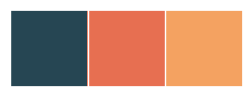

In [9]:
# Configurações de Layout, Matlab e Seaborn
LAYOUT_PALETTE = ["#264653","#e76f51","#f4a261"]
sns.set_palette(sns.color_palette(LAYOUT_PALETTE))

cm = sns.light_palette("#e76f51")

sns.palplot(sns.color_palette(LAYOUT_PALETTE))

In [10]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 30)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Data Loading</p></div>

In [11]:
data_train_raw = pd.read_csv('datasets/train.csv')
data_test_raw = pd.read_csv('datasets/test.csv')

In [12]:

data_train_raw.shape, data_test_raw.shape

((103904, 24), (25976, 23))

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Data Description</p></div>

In [13]:
df = data_train_raw.copy()
teste = data_test_raw.copy()

#### <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:70%">Dicionário de Dados</p></div> 

Gender:* Gênero do cliente.

Age: Idade do cliente.

Type of Purchase: O tipo de compra.

Store size: O tamanho da loja.

Store distance: Distância até o centro da cidade.

InStore wifi: Nível de satisfação com o Wifi da Loja.

Open/Close time convenient: Nível de satisfação do horário de abertura e fechamento da loja.

Easy of online shopping: Nível de satisfação com a compra online.

Store location: Nível de satisfação com a acesso a loja.

Toilet cleaning: Nível de limpeza dos banheiros.

Dressing room: Nível de satisfação com o provador.

Waiting room: Nível de satisfação do local de espera dentro da loja.

Kids entertainment: Nível de satisfação do espaço kids.

Seller service: Nível de satisfação com o atendimento dos vendedores.

Showroom: Nível de satisfação com a disposição das roupas no interior da loja.

Self-Store: Nível de satisfação com os guarda-volumes da loja.

Purchase service: Nível de satisfação do atendimento no pagamento.

Inflights Service: Store Service.

Cleanliness: Nível de satisfação com a limpeza da loja.

Carrier delay in minutes: Tempo de atraso do produto na saída da transportadora.

Delivery delay in minutes: Tempo de atraso na entrega do produto até a casa do cliente.

In [14]:
# Detalha as principais informaçoes sobre os dados
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 64924.2 (37463.8)min < med < max:1.0 < 64856.5 < 129880.0IQR (CV) : 64834.5 (1.7),"103,904 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB/UlEQVR4nO3Xu2/aUBiG8e+YFB0utcUlsLFk7GaJhaVbx/6xXbuDlJmhSyYWhISMEU5QLeourdQhFx0Sidfp85t5weI8BwlXVZUBKqJLPwDwr6tLP8BjnHMtM2ueOY/M7FfNtj+rqno4c/uuPBvkhcLw/X7/S5IkndDh6XT6UBTFTbfbvYuiqKzD1sxst9sdnHPfzewYurV3dgGfDNI51xoMBl/jOO6FftprDqgsS29mn6bT6e1wONyHbFerVW+5XF6nafpjPB5nddiu1+uPi8Xi82QyGTYajaAg63oB9/t95pz79liUz/1CNuM47s1ms4ckSYK+qDc43Lb3vhyNRvch2yzLWmZmnU7nWKet976dpumxLpfoNds8z/18Pu9tt9ummQUFaWZmSZJc5HD/N3W7ROdu/3jyjPmXDSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSlXL70gz3Mf+qaHw8GbmRVF4TebTZst279e6uk3y/s32buyXp8AAAAASUVORK5CYII="">",0(0.0%)
2,Gender[object],1. Female2. Male,"52,727 (50.7%)51,177 (49.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBN5BvwxOi96zgYy6GBL/QWjNAIZjZ3cxuvQ8Z1Ku19uh9xCjiPM9fKaWp9yEjqrXuIYRvgntPTClN67o+cs7P3seM5DiOz1LKtG3bzcyI7Q3RzCzn/FyW5af3MQO69z5gJB+9D8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sQsPcho+GZ+cVa615KmYwPAd1qrbuZvXrfMQoGL9cweHEITPmgwpvNj7fZSUz5nJjvnceUz4H53jVM+fz41X4Sf+pChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhmmfA48p2uY8jkx3zuPwYsfg5eTfgEKW2rfqvpg/AAAAABJRU5ErkJggg=="">",0(0.0%)
3,Customer Type[object],1. Loyal Customer2. disloyal Customer,"84,923 (81.7%)18,981 (18.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABLUlEQVR4nO3bwYnDMBQG4afFhM1FwhhcTIrYYrcIdWOMdUhCLt7D9jASeL4GXiCTQIL/dJ5nSIQUEfeIuPV+Ieric57nizo2Lcvyk3OeqYMaR2ttTyn9UsFNOef58Xi8Silv4qDGcBzHd6113rbtFhFMbBERpZT3uq5P4qCGciePfZHHdG3GJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzDGJoyxCTNF/D9I1/uFiNXjPZ9aa3utdQ74QTr111rbI+JD3XPwcm3o4CU55ROlxzcb+mnSOPApHz0f0zjQKV+P+ZjG0WPK56/ei/JPXWGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjEwad8jkZvDZ8ykfPxzQOBy/C/AEKW2rf7SbDxQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Age[int64],Mean (sd) : 39.4 (15.1)min < med < max:7.0 < 40.0 < 85.0IQR (CV) : 24.0 (2.6),75 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACeklEQVR4nO3cwa6aQBSA4TP1alBzIcZGd7xAky5cuukb9GG77a4LfQHfwA0xMYiRXiIiXbRNu2ivYbjoYfi//QQSf4XBYUxZlgJo8e7RJwD87enRJ/AvxpihiAwsh5/Lsnxp03Hxh7ogjTHD6XT62ff9ic344/EYG2O+VI2j7nEPh8PJGPNVRDKL4cT8i7ogRWTg+/5kuVy+BEFQ6cNNksRbrVaT/X4/EJGqH7D1caMoel6v15/CMHzf6/UqB2n7JXKRxiBFRCQIgmw2m323GDq893HjOB56njdaLBbZfD6Pq4yt+SVyjtog22g8Hj/kS+QSZtlQhSChinOX7KIo+iLiG2OqDvWv12u/gVNCBU4FmaZpP8/zj2EY9qrOdvM894qi+JBl2TcRsbkPxBtwKsjz+fxkO9vdbreTzWYzulwuvabOD7c5FeRvNrPdOI6Z6SrApAaqECRUIUio4uQ9ZNvUeFQl4tjCDIJ8sDqPqkTcW5hBkA9W51GViwszCFIJFmb8xKQGqhAkVCFIqEKQUIUgoQpBQhWChCoECVUaezBeYxcIXiXosEaCrLMLBK8SdFtTv5DWu0DwKkG3Nfpftu0uEE2dD/RjUgNVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVOG97JZzbRsWgmwxF7dheTVIFtnq5uI2LP8NkkW27eHSNiyv/UKyyBZ3d/MekkW2uCce+0AVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKiw/6zCNaykJsqO0rqUkyI7SupaSIDvOdi1lURS+NHC5vxlkkiRe1aOdTidPRCRNU2+3240Y69bYKIqem7rc/wBJX5oTOlxn2QAAAABJRU5ErkJggg=="">",0(0.0%)
5,Type of Purchase[object],1. Gift2. Personal,"71,655 (69.0%)32,249 (31.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNp

In [15]:
summary_stats(df)

,counts,mean,std,median,sum,min,max,range,25%,75%,skew,kurt
id,103904.00,64924.21,37463.63,64856.50,6745885168.00,1.00,129880.00,129879.00,32533.75,97368.25,0.00,-1.20
Age,103904.00,39.38,15.11,40.00,4091709.00,7.00,85.00,78.00,27.00,51.00,-0.00,-0.72
Store distance,103904.00,1189.45,997.14,843.00,123588444.00,31.00,4983.00,4952.00,414.00,1743.00,1.11,0.27
InStore wifi,103904.00,2.73,1.33,3.00,283625.00,0.00,5.00,5.00,2.00,4.00,0.04,-0.85
Open/Close time convenient,103904.00,3.06,1.53,3.00,317977.00,0.00,5.00,5.00,2.00,4.00,-0.33,-1.04
Easy of online shopping,103904.00,2.76,1.40,3.00,286453.00,0.00,5.00,5.00,2.00,4.00,-0.02,-0.91
Store location,103904.00,2.98,1.28,3.00,309310.00,0.00,5.00,5.00,2.00,4.00,-0.06,-1.03
Toilet cleaning,103904.00,3.20,1.33,3.00,332714.00,0.00,5.00,5.00,2.00,4.00,-0.15,-1.15
Dressing room,103904.00,3.25,1.35,3.00,337727.00,0.00,5.00,5.00,2.00,4.00,-0.45,-0.70
Waiting room,103904.00,3.44,1.32,4.00,357367.00,0.00,5.00,5.00,2.00,5.00,-0.48,-0.93


In [16]:
#Separa as variaveis numericas e categoricas
num_atributes = df.select_dtypes( include=['int64', 'float64'])
cat_atributes = df.select_dtypes( exclude=['int64', 'float64'])

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Data Preprocessing</p></div>

Na etapa de preprocessamento de dados, os dados brutos são submetidos a uma série de técnicas e transformações para garantir que estejam em um formato adequado e pronto para análise de dados e posteriormente modelagem dos algoritimos.

In [17]:
## Aplicando as alterações na base de treino
df = PREPROCESSING(df)

NaN Antes:  310
NaN Depois:  0


In [18]:
## Aplicando as alterações na base de teste
teste = PREPROCESSING(teste)

NaN Antes:  83
NaN Depois:  0


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

A análise exploratória de dados é uma abordagem inicial na análise de um conjunto de dados, visando entender suas características principais, padrões, distribuições e relações. Utiliza-se de gráficos, estatísticas e técnicas de resumo para obter insights e guiar o processo de modelagem e interpretação dos dados.

In [19]:
df_eda = df.copy()

### <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:100%">Analise Univariada</p></div> 

#### <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:70%">Variavel Resposta</p></div> 

Clientes Satisfeitos: 45025
Clientes Neutros/Insatisfeitos: 58879


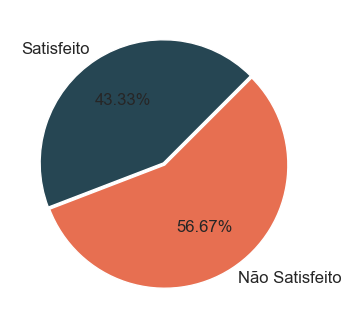

In [20]:
plt.figure(figsize=(4, 4))
plt.pie([len(df_eda.loc[df_eda['Satisfaction'] == 'Satisfied']), 
         len(df_eda.loc[df_eda['Satisfaction'] == 'Neutral or Dissatisfaction'])],
        labels=['Satisfeito', 'Não Satisfeito'],
        colors=['#264653', '#e76f51'],
        explode=(0.01, 0.01),
        startangle=45,
        autopct='%.2f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': "white"},
        textprops={'fontsize': 12});

print(f"Clientes Satisfeitos: {df_eda['Satisfaction'].value_counts()[1]}")
print(f"Clientes Neutros/Insatisfeitos: {df_eda['Satisfaction'].value_counts()[0]}")

#### <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:70%">Variaveis Numericas</p></div> 

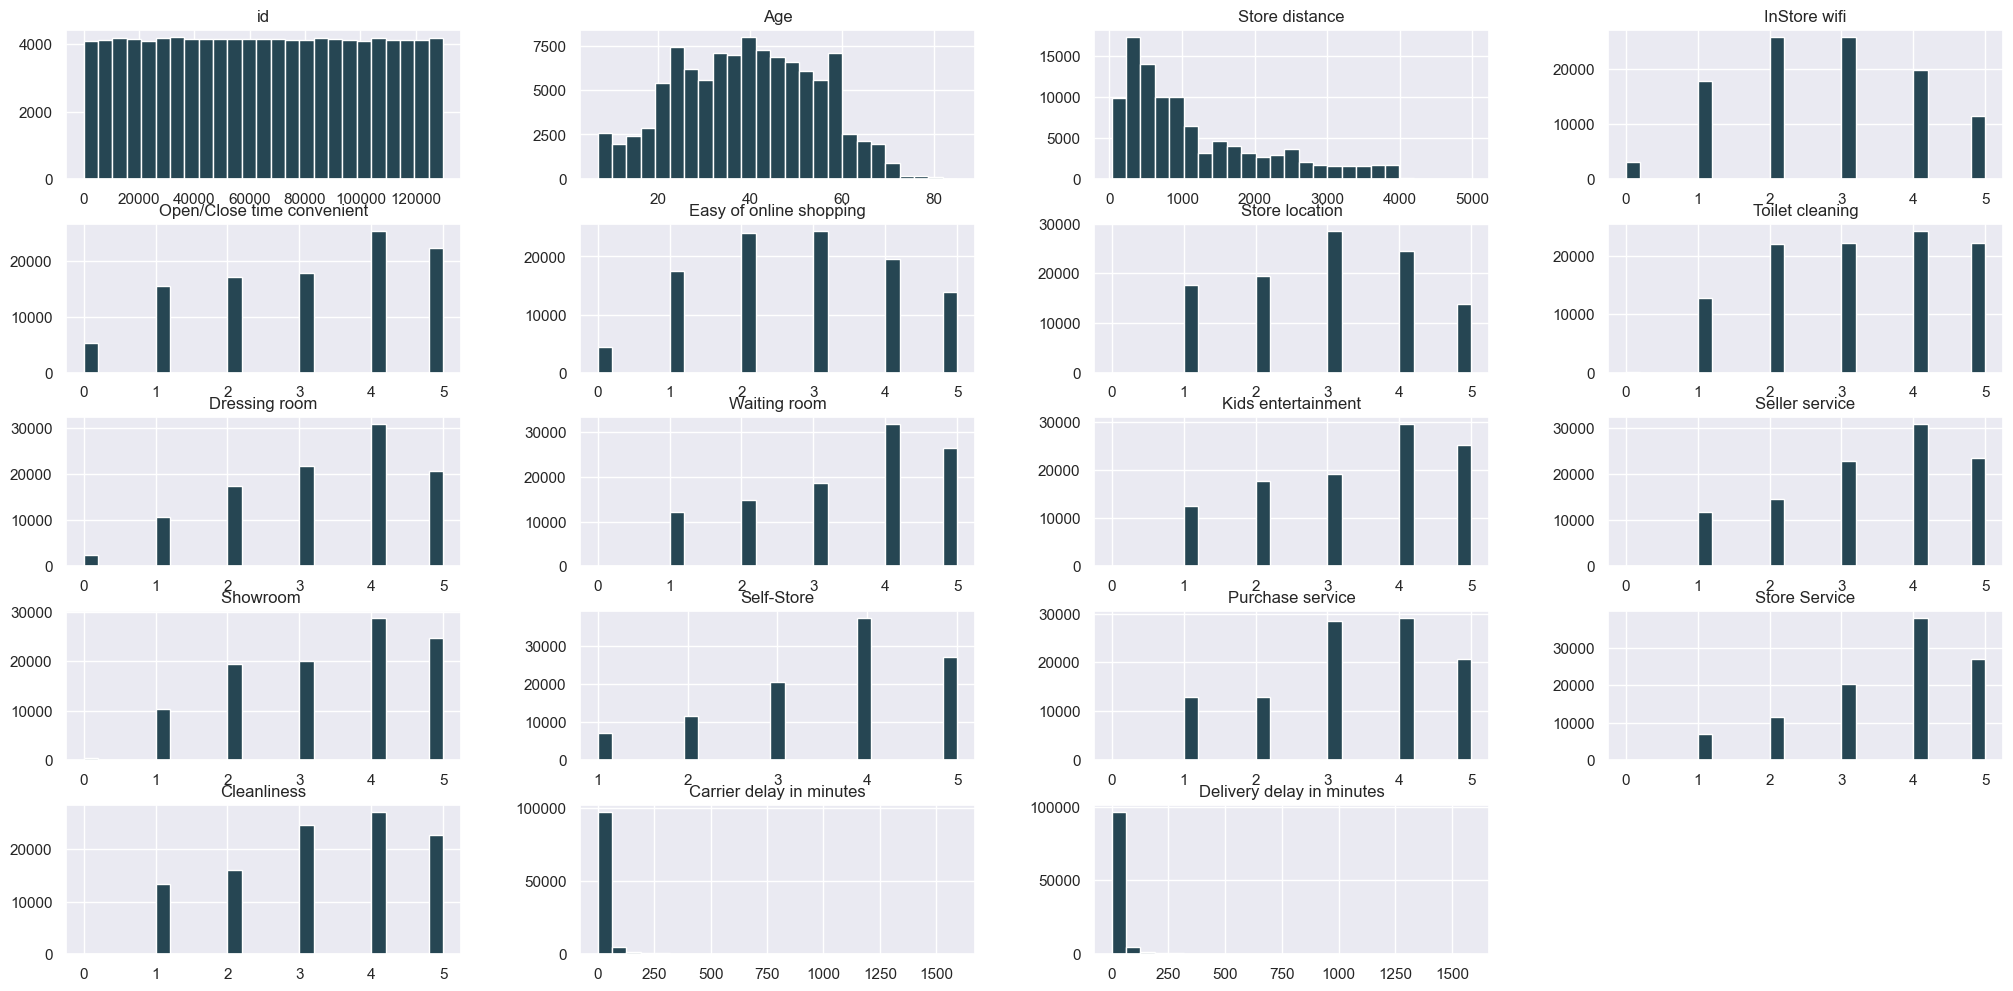

In [21]:
# Utiliza método .hist() para obter histograma de todas variaveis numericas
num_atributes.hist( bins=25);

#### <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:70%">Variaveis Categoricas</p></div> 

In [22]:
#Quantidades de níveis de cada variavel categorica
cat_atributes.apply( lambda x: x.unique().shape[0])

Gender              2
Customer Type       2
Type of Purchase    2
Store size          3
Satisfaction        2
dtype: int64

<Axes: xlabel='id', ylabel='Density'>

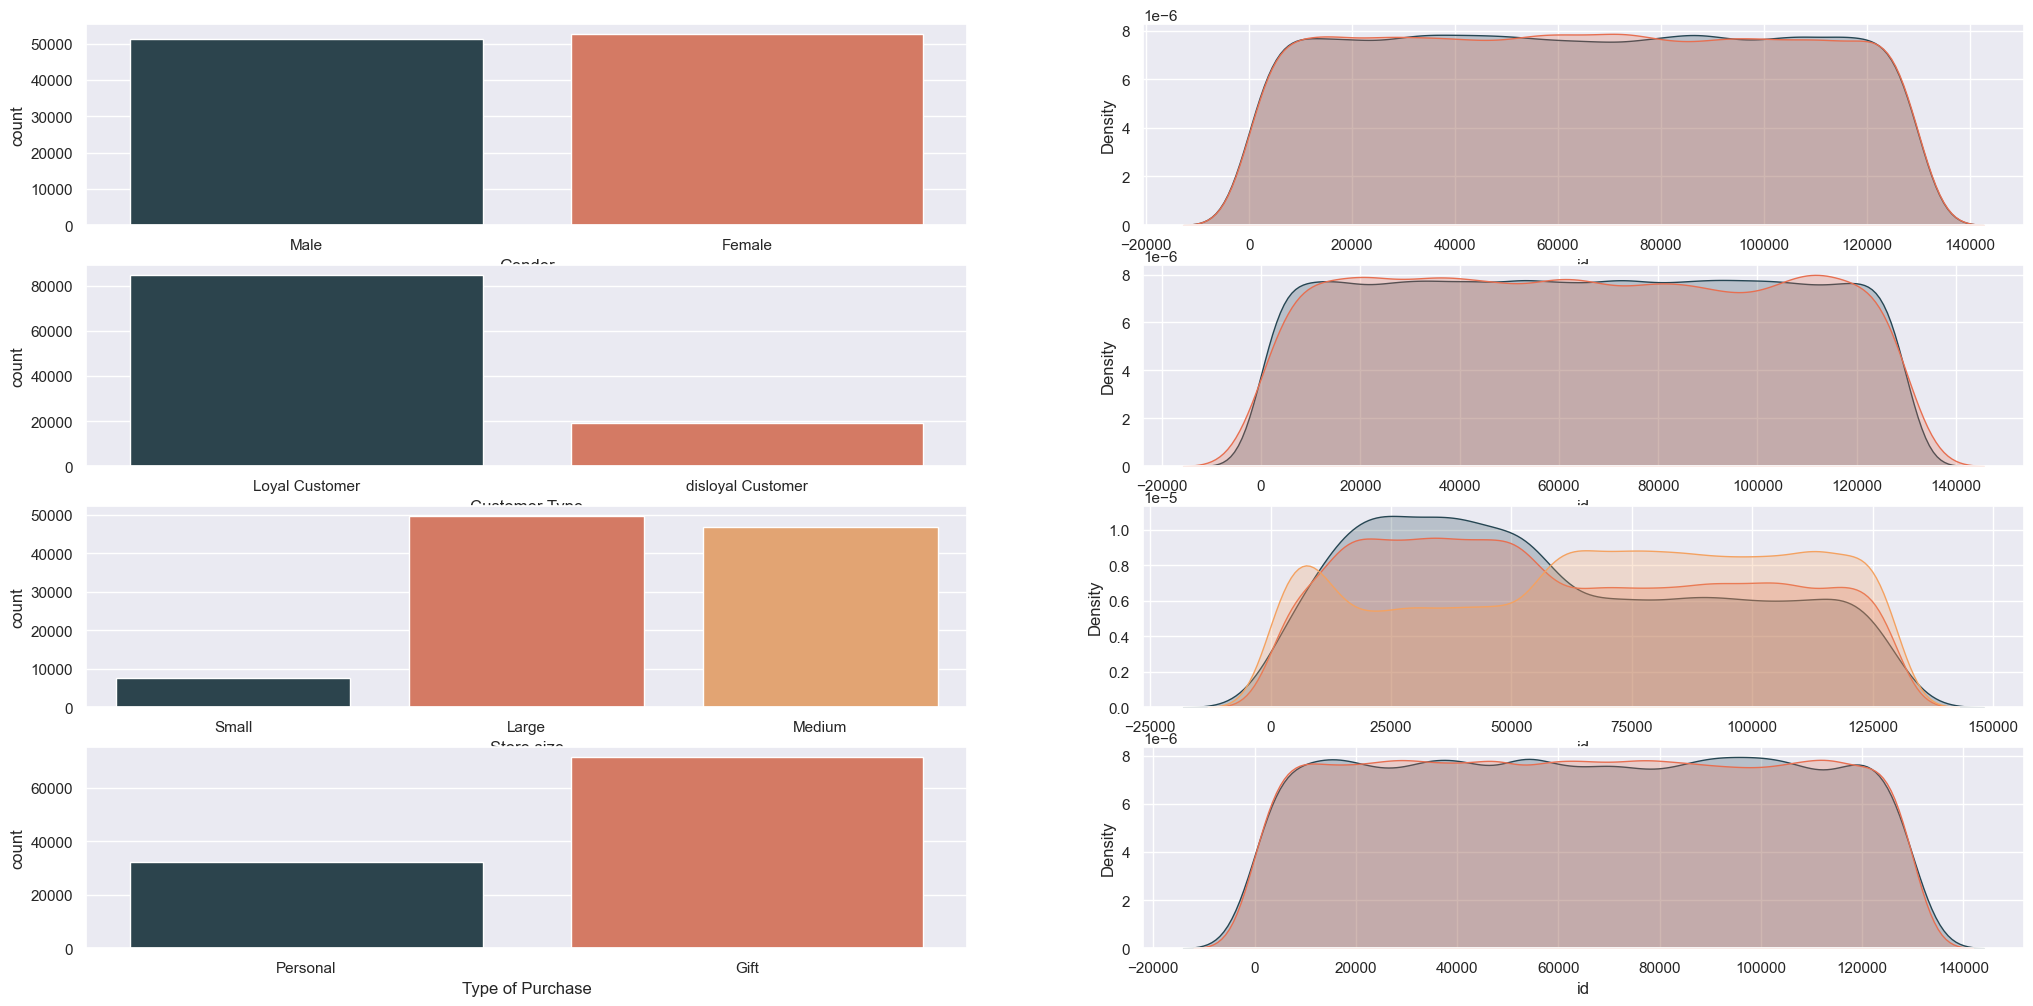

In [23]:
#Grafico de distribuicao de densidade das categorias 

# Gender
plt.subplot( 4, 2, 1 )
sns.countplot(df_eda, x='Gender')
plt.subplot( 4, 2, 2 )
sns.kdeplot( df_eda[df_eda['Gender'] == 'Female']['id'], label='Female', fill=True )
sns.kdeplot( df_eda[df_eda['Gender'] == 'Male']['id'], label='Male', fill=True )
# Customer Type
plt.subplot( 4, 2, 3 )
sns.countplot( df_eda, x='Customer Type')
plt.subplot( 4, 2, 4 )
sns.kdeplot(  df_eda[ df_eda['Customer Type'] == 'Loyal Customer']['id'], label='Loyal Customer', fill=True )
sns.kdeplot( df_eda[df_eda['Customer Type'] == 'disloyal Customer']['id'], label='disloyal Customer', fill=True )
# Story size
plt.subplot( 4, 2, 5 )
sns.countplot( df_eda,  x='Store size')
plt.subplot( 4, 2, 6 )
sns.kdeplot( df_eda[df_eda['Store size'] == 'Small']['id'], label='Small', fill=True )
sns.kdeplot( df_eda[df_eda['Store size'] == 'Medium']['id'], label='Medium', fill=True )
sns.kdeplot( df_eda[df_eda['Store size'] == 'Large']['id'], label='Large', fill=True )
# Type of Purchase
plt.subplot( 4, 2, 7 )
sns.countplot( df_eda,  x='Type of Purchase')
plt.subplot( 4, 2, 8 )
sns.kdeplot( df_eda[df_eda['Type of Purchase'] == 'Personal']['id'], label='Personal', fill=True )
sns.kdeplot( df_eda[df_eda['Type of Purchase'] == 'Gift']['id'], label='Gift', fill=True )


### <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:100%">Analise Bivariada</p></div> 

#### <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:70%">Principais Insights</p></div> 

 Algumas hipoteses

- H1 - Quem faz compras pessoais (uso próprio) fica mais satisfeito.
- H2 - Clientes que dão notas 4 ou 5 em relação ao serviço da loja, ficam mais satisfeitos.
- H3 - Quanto maior o tempo de entrega maior a insatisfação.

**H1:**  Quem faz compras pessoais (uso próprio) fica mais satisfeito.

**Falso:** Um dos possíveis motivos pode ser que esses clientes não usam de alguns features da loja, como o provador, lugar de espera, que podem estar impactando negativamente nessa experiência. Nao podemos descartar a hipótese de que há um problema em relação à qualidade do produto

Clientes Satisfeitos: 45025
Clientes Neutros/Insatisfeitos: 58879


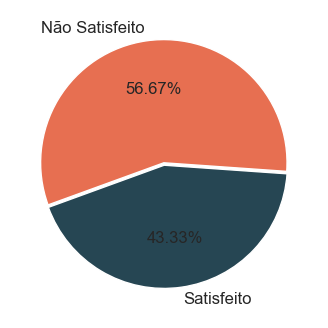

In [24]:
plt.figure(figsize=(4, 4))
plt.pie([len(df_eda.loc[df_eda['Satisfaction'] == 'Satisfied']), 
         len(df_eda.loc[df_eda['Satisfaction'] == 'Neutral or Dissatisfaction'])],
        labels=['Satisfeito', 'Não Satisfeito'],
        colors=['#264653', '#e76f51'],
        explode=(0.01, 0.01),
        startangle=200,
        autopct='%.2f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': "white"},
        textprops={'fontsize': 12});

print(f"Clientes Satisfeitos: {df_eda['Satisfaction'].value_counts()[1]}")
print(f"Clientes Neutros/Insatisfeitos: {df_eda['Satisfaction'].value_counts()[0]}")

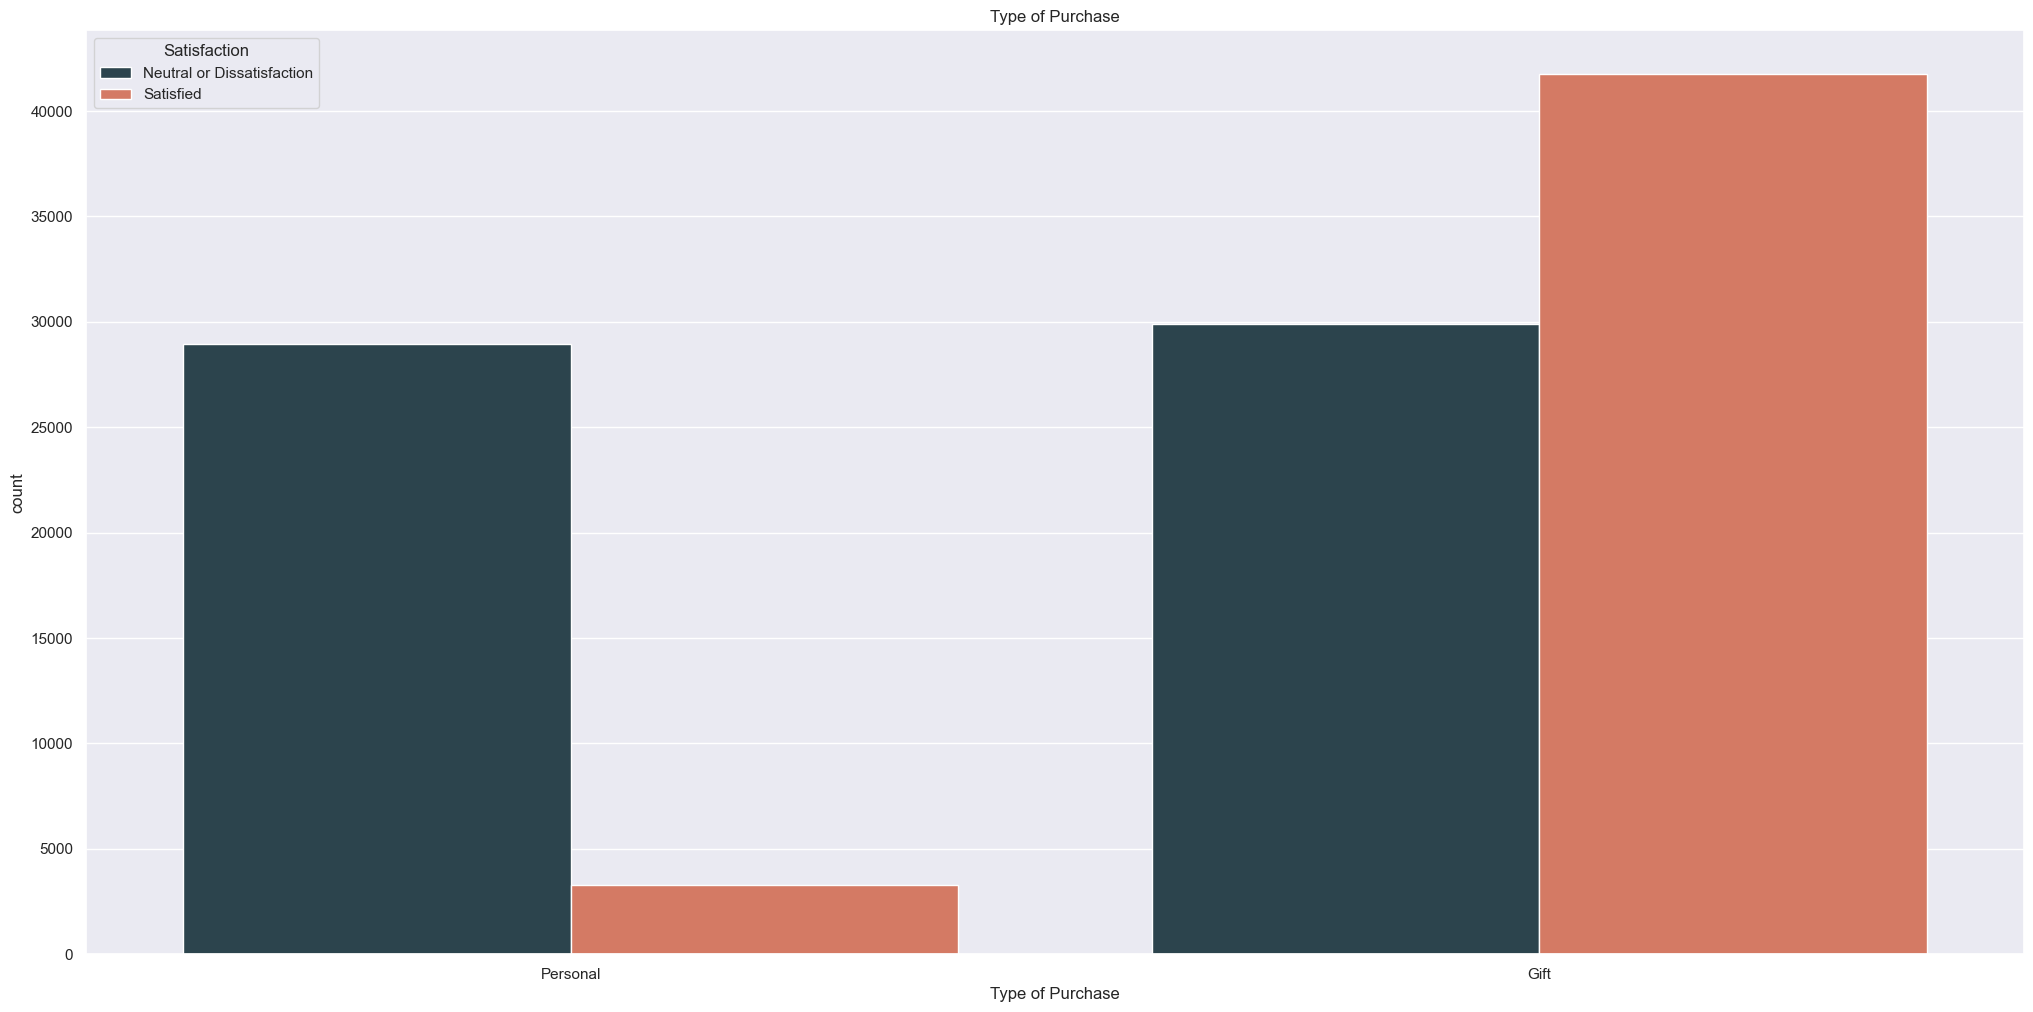

In [25]:
sns.countplot(data=df_eda, x="Type of Purchase", hue="Satisfaction",  palette=LAYOUT_PALETTE)
plt.title("Type of Purchase");

**H2:** Clientes que dão notas 4 ou 5 em relação ao serviço da loja, ficam mais satisfeitos.

**Falso :** Nota-se que mesmo com uma nota 4, ainda temos mais clientes insatisfeitos no geral, fato que só muda na avaliação de 5, onde temos um maior número de clientes satisfeitos. É preciso enfatizar a necessidade de oferecer um serviço excelente para otimizar a satisfação dos clientes, seja através de treinamentos ou de outras informações obtidas com pesquisas.

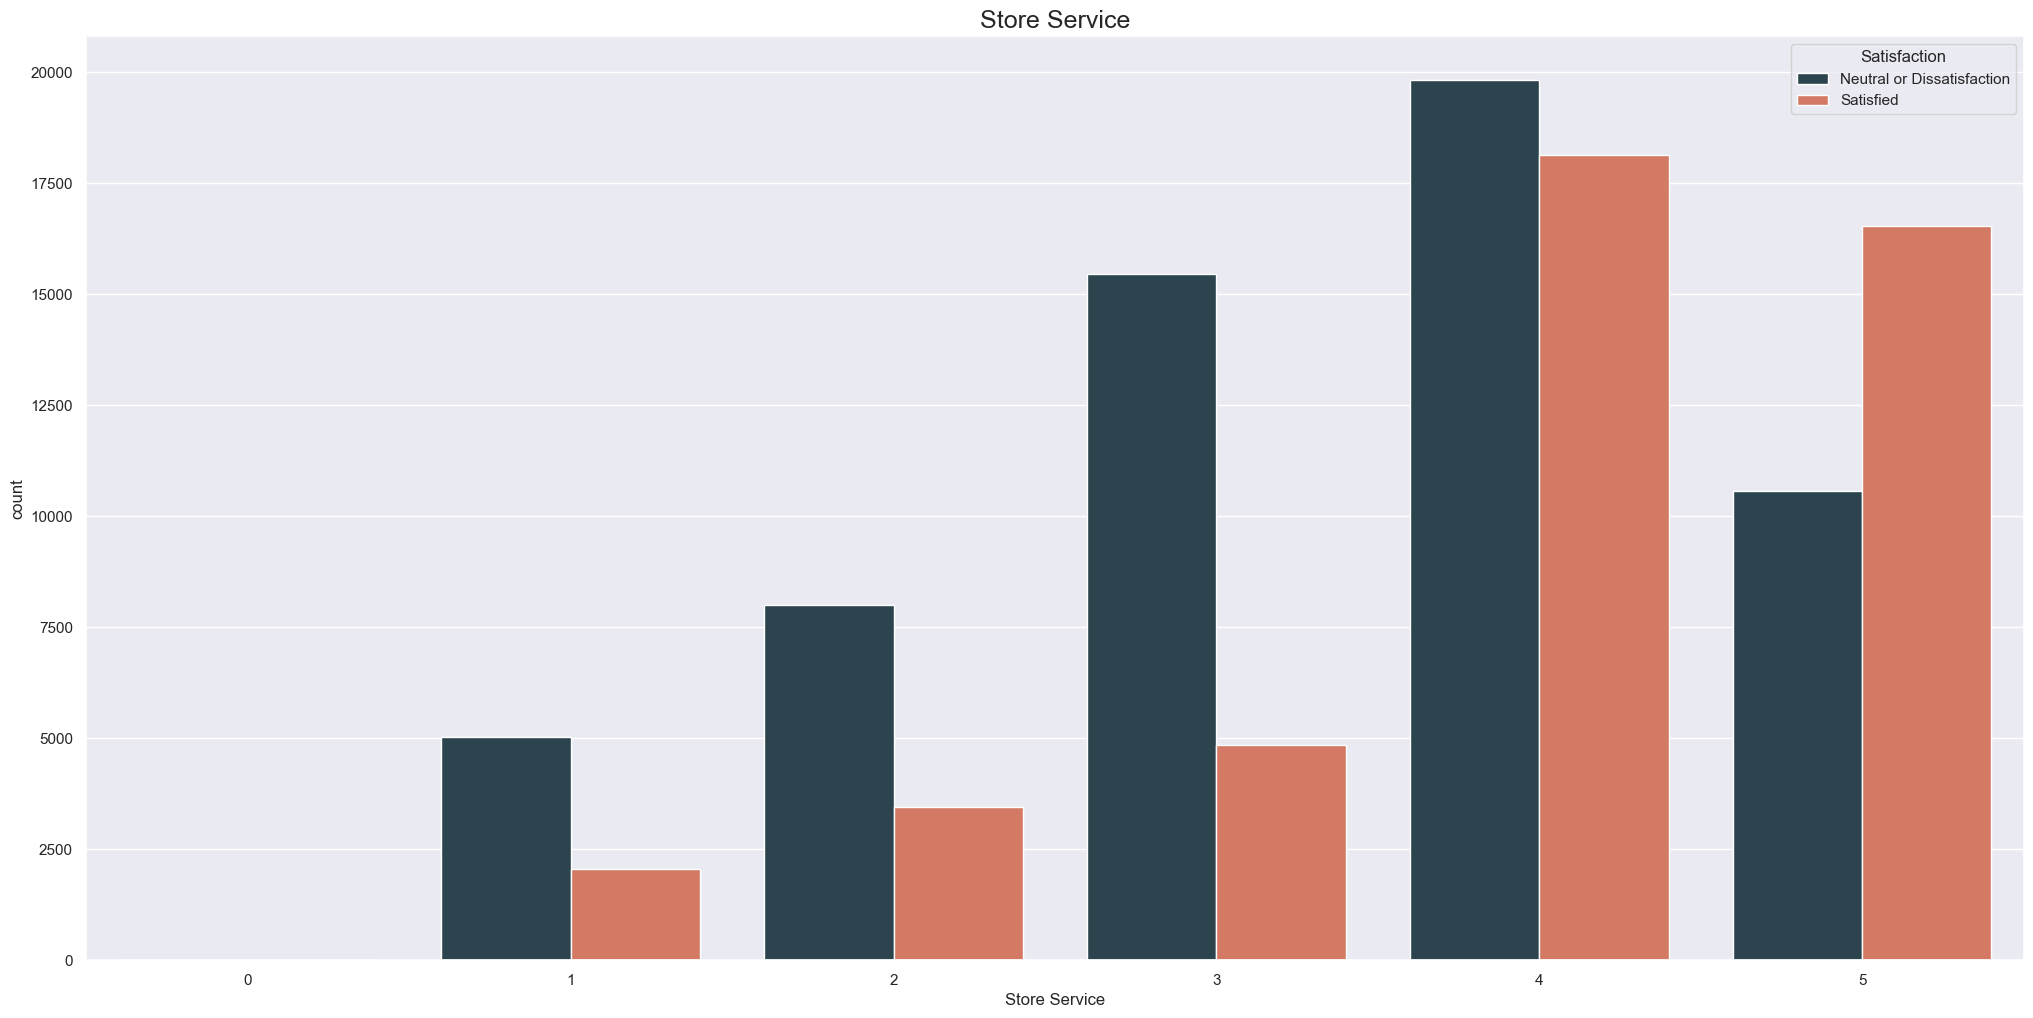

In [26]:
sns.countplot(data=df_eda, x="Store Service", hue='Satisfaction', palette=LAYOUT_PALETTE)
plt.title("Store Service",fontsize=18);

**H3** - Quanto maior o tempo de entrega maior a insatisfação.

**Verdadeiro:**  Quanto maior o atraso na entrega ( seja na operação ou na logística), maior a chance do cliente ficar insatisfeito. Isso ressalta na importância de se ter uma operação focada e entregando no prazo e serem áreas de destaque para receberem recursos.

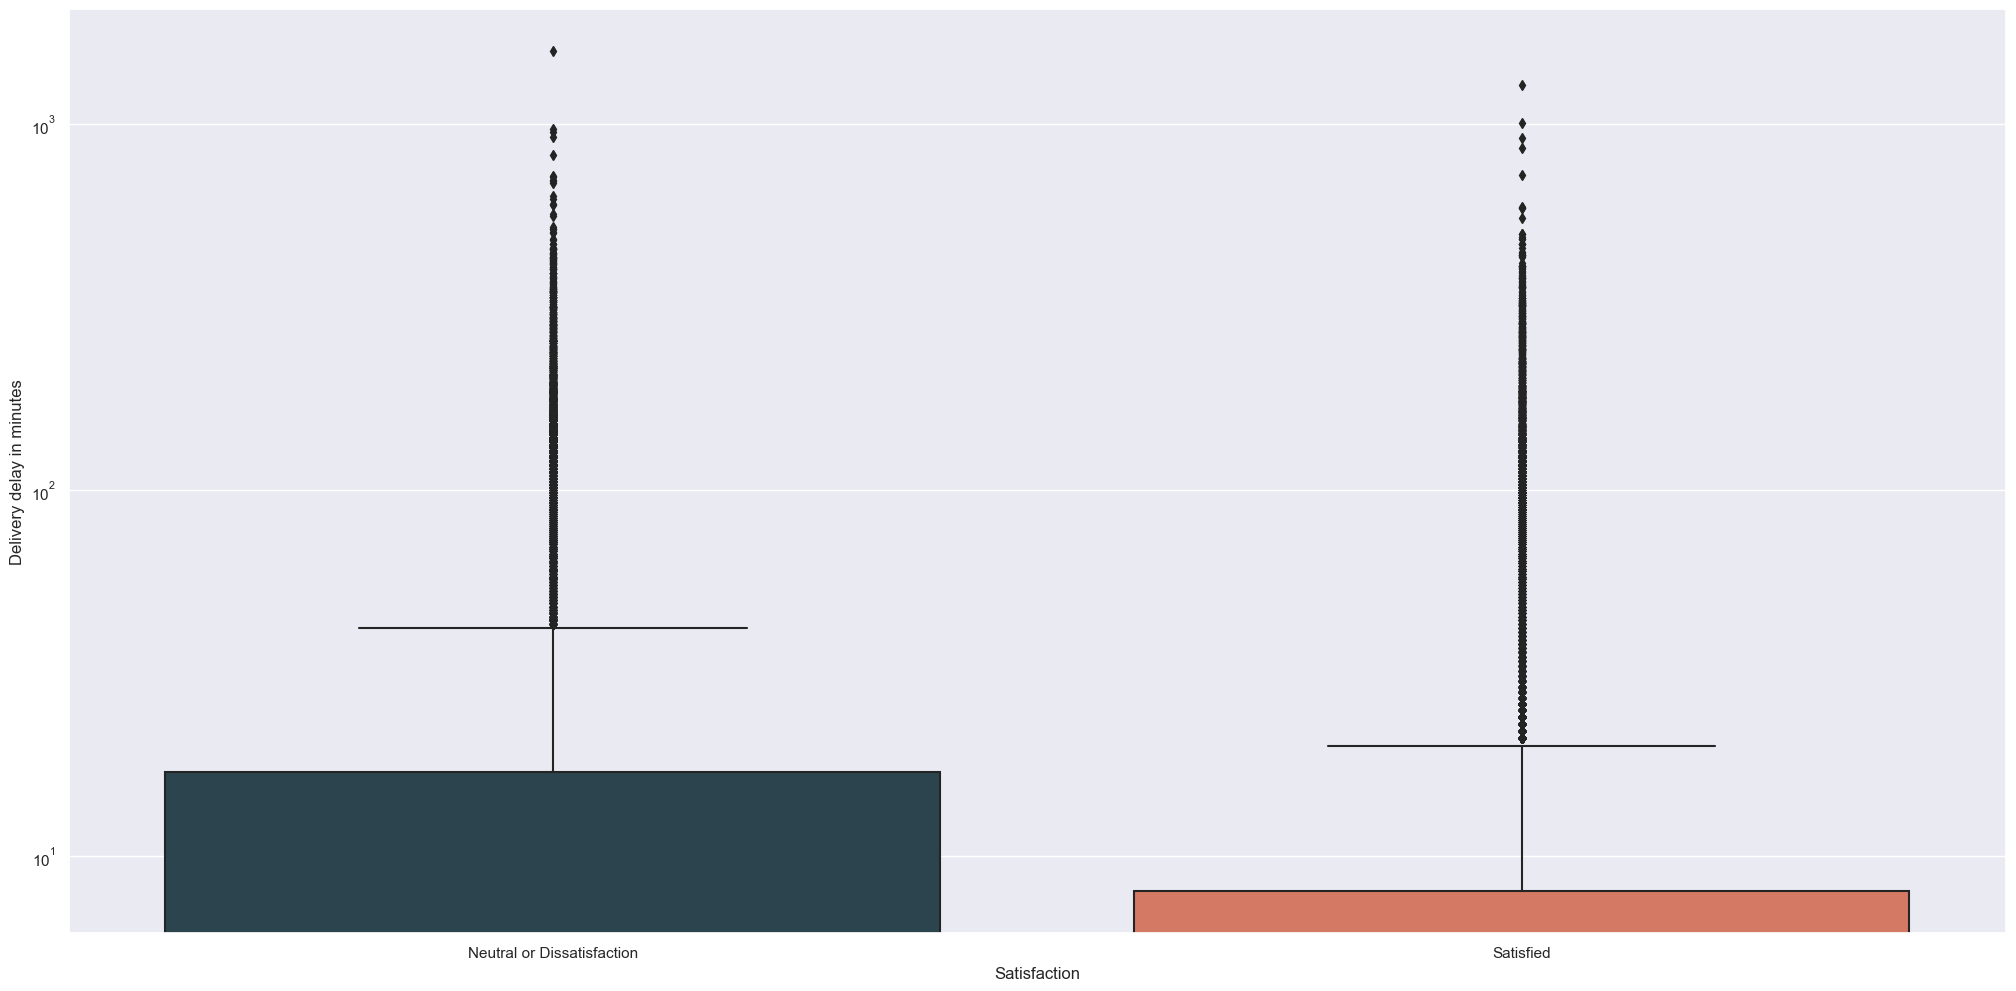

In [27]:
sns.boxplot(data=df, x='Satisfaction', y='Delivery delay in minutes', palette=LAYOUT_PALETTE)
plt.yscale('log')

**Cenários de possiveis ações:**

- Foco na compra online, menos custos relacionados à loja física e maior satisfação dos clientes.
    
- Otimização no sistema online para evitar sobrecargas e/ou possíveis ausências de dados.
    
- Avaliação das operações logísticas para entender os motivos de atrasos dentro e fora da operação.

### <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:100%">Analise Multivariada</p></div> 

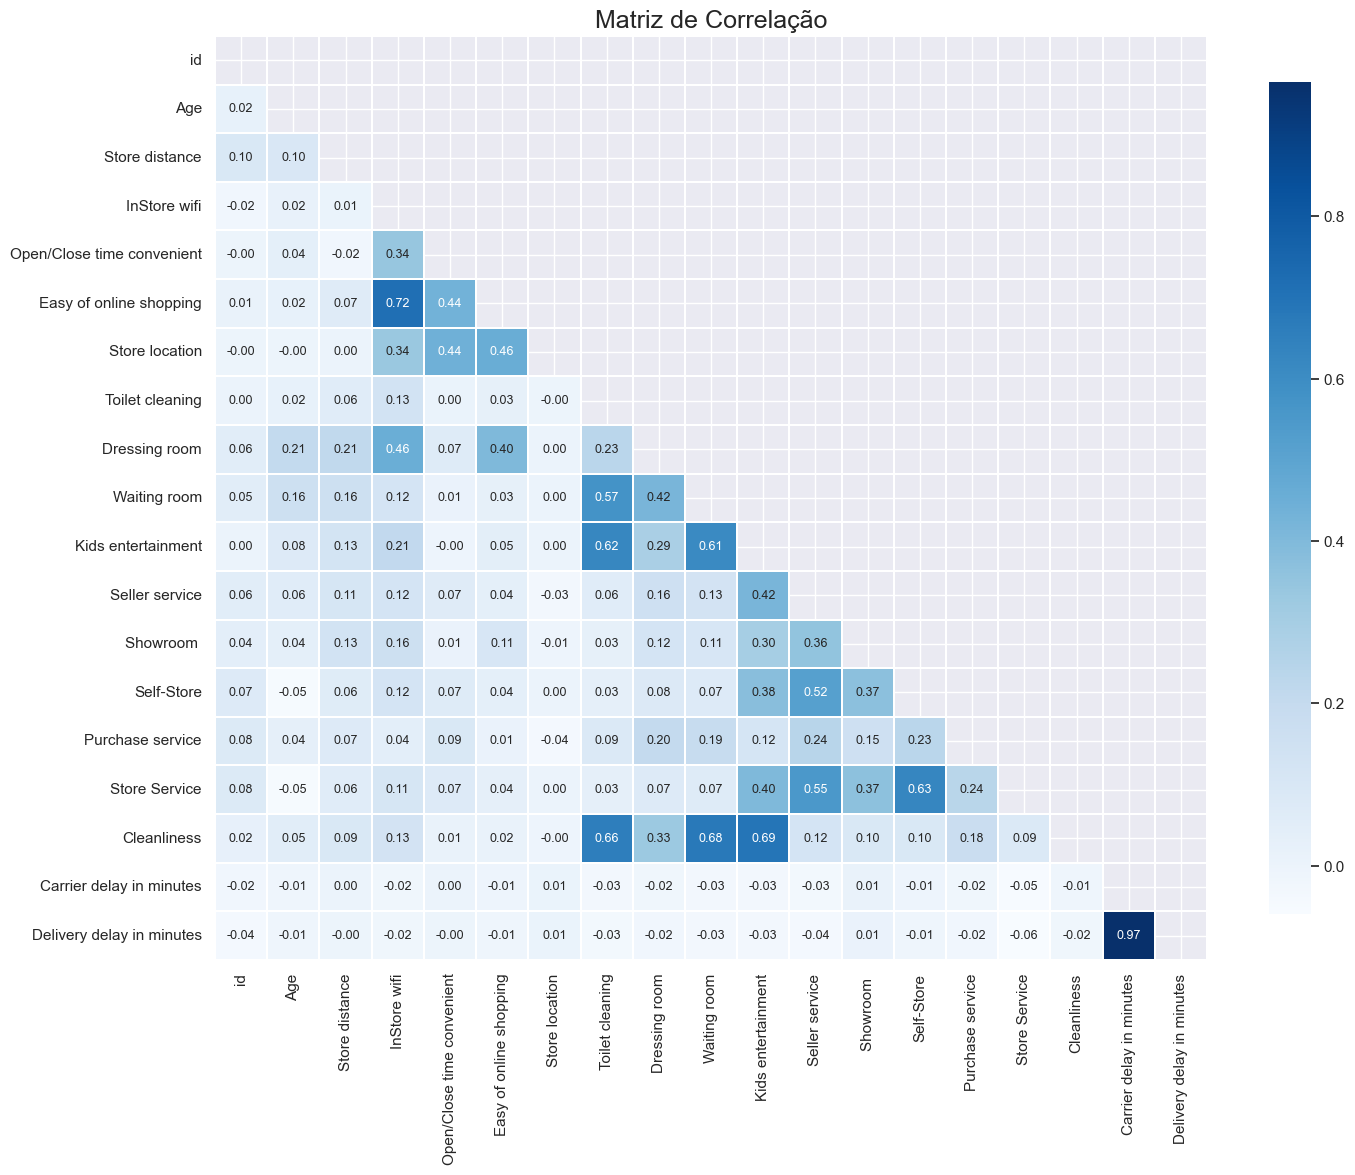

In [28]:
# Cria Matriz de correlação das variaveis numericas
mask = np.zeros_like(num_atributes.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Matriz de Correlação',fontsize=18)
sns.heatmap(num_atributes.corr(),linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,mask=mask,annot_kws={"size":9},cbar_kws={"shrink": .9});

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Data Preparation</p></div> 

Na etapa de preparação de dados, os dados são tratados e formatados adequadamente para serem utilizados no modelo de machine learning. Isso geralmente inclui a conversão de variáveis categóricas em numéricas, a criação de novas features com base no conhecimento do domínio, a redução de features desnecessárias, a aplicação de transformações logarítmicas em variáveis numéricas, entre outras técnicas. 

In [29]:
df_prep = df.copy()

In [30]:
# Seta a variavel resposta como alvo 
TARGET = 'Satisfaction'

In [31]:
# Aplica tecnicas de Encoding e Rescale a base de treino
df_prep = ENCODING(df_prep, is_train=True)
df_prep = RESCALE(df_prep)

In [32]:
# Aplica tecnicas de Encoding e Rescale a base de teste
teste = ENCODING(teste, is_train=False)
teste = RESCALE(teste)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Feature Selection</p></div> 

Na etapa de seleção de features, são analisadas as variaveis que tem mais importancia para o treinamento dos modelos.

- Como o projeto em questão foi desenvolvido para uma competição no Kaggle e seu objetivo era alcançar a maior performance possivel, foram usadas todas as features para treinamento dos modelos, Pois foram nessas condições onde melhor performou.
- Em condições normais as features usadas iriam ser escolhida usando a analise de importancia das features realizada por meio da biblioteca Shap, presente no tópico abaixo.

In [33]:
# Seleção manual de features
SELECTED_FEATURES = ['id', 
                     'Gender', 
                     'Customer Type', 
                     'Age', 
                     'Type of Purchase',
                     'Store size', 
                     'Store distance', 
                     'InStore wifi',
                     'Open/Close time convenient', 
                     'Easy of online shopping',
                     'Store location', 
                     'Toilet cleaning', 
                     'Dressing room', 
                     'Waiting room',
                     'Kids entertainment', 
                     'Seller service', 
                     'Showroom ', 
                     'Self-Store',
                     'Purchase service', 
                     'Store Service', 
                     'Cleanliness',
                     'Carrier delay in minutes', 
                     'Delivery delay in minutes',
                    ]

In [34]:
# Atribui a y e x a variavel resposta e features usadas no treino do modelo, respectivamente
y = df_prep[TARGET]
X = df_prep[SELECTED_FEATURES]

In [35]:
# Atribui a x_test as features do conjunto de teste do modelo
X_test = teste[SELECTED_FEATURES]

### <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:100%">Feature Importance</p></div> 

In [36]:
# Treina modelo simples para entender a importancia de cada feature no modelo 
lgbm_model = LGBMClassifier()
lgbm_model.fit(X, y)
explainer = shap.Explainer(lgbm_model, X)
shap_values = explainer(X)

100%|===================| 103761/103904 [07:35<00:00]        

In [37]:
#Inicializa ambiente biblioteca Shap
shap.initjs()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


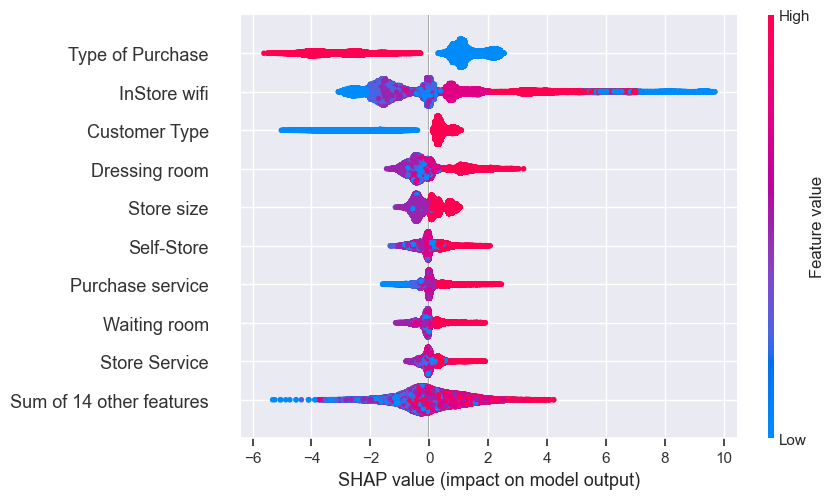

In [38]:
# Explicabilidade Geral, grafico de enxame que demonstra quais features têm as maiores contribuições positivas ou negativas para cada exemplo.
shap.plots.beeswarm(shap_values)

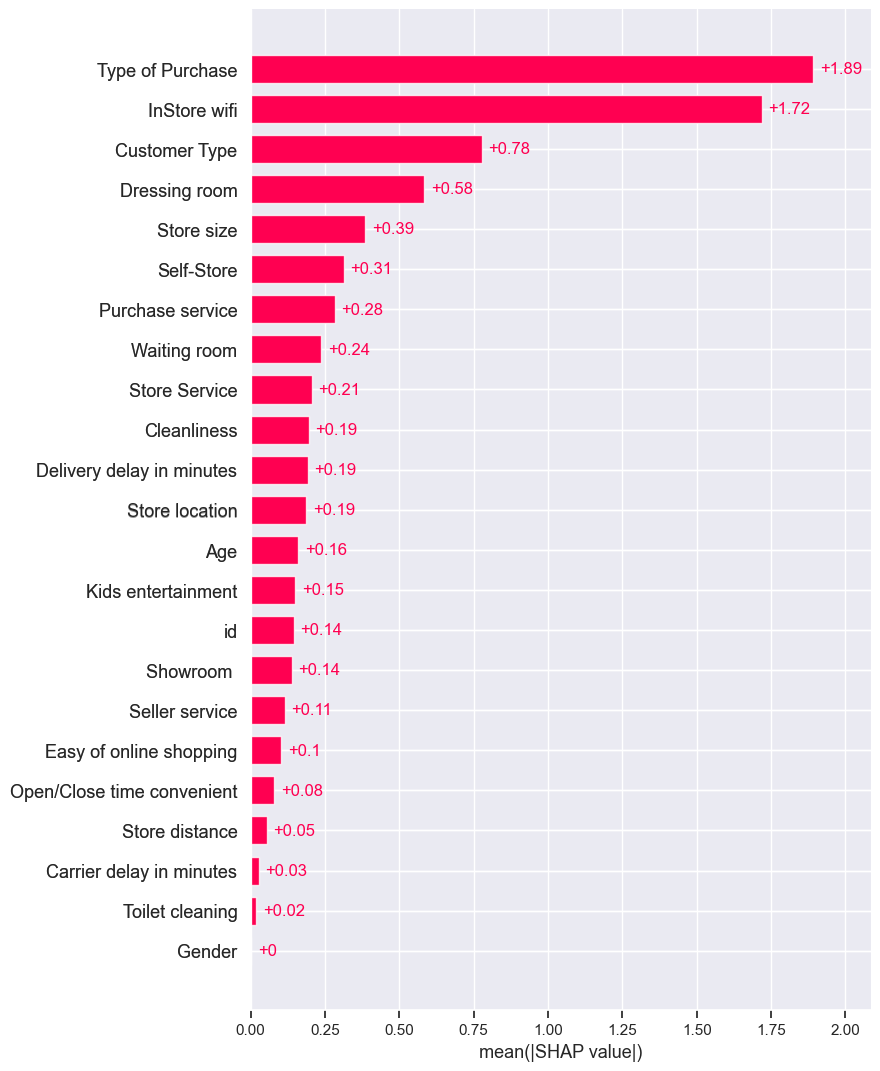

In [39]:
#Explicabilidade Geral, média de contribuição de cada feature para tomada de decisão do modelo
shap.plots.bar(shap_values, max_display=25)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Models</p></div> 

Nessa etapa são testados alguns dos principais algortitimos do mercados, pois possuem bom desempenho.

- Lightgbm
- XGBoost
- Random Forest
- Voting Classifier

In [40]:
# Faz split dos dados em treino e validação e mantem  distribuição original das classes 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle=True, random_state=RANDOM_SEED)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((83123, 23), (83123,), (20781, 23), (20781,))

In [41]:
results = df_prep[['Satisfaction']].copy()

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">LightGBM</p></div> 

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">LightGBM - Hypertunning</p></div> 

In [42]:
# Função de otimização de hiperametros em conjunto com a biblioteca Optuna
def objective(trial):    
   
    param_grid = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt','dart']), 
        'num_leaves': trial.suggest_int('num_leaves', 60, 120, step=5),
        'max_depth': trial.suggest_int('max_depth', 9, 21),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.3), 
        #'learning_rate': trial.suggest_categorical('learning_rate', [0.25]),
        #'max_bin': trial.suggest_int('max_bin', 50, 250, step=10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1e-1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-6, 1e-4, log=True),
        'seed': trial.suggest_categorical('seed', [RANDOM_SEED])        
        
    }
    
    model = LGBMClassifier(**param_grid)
    
    number_folds = 3
    kfold = StratifiedKFold(n_splits=number_folds, shuffle=True)
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    
    return f1_score(y, y_pred)

In [43]:
# Executa a função de otimização e retorna a melhor combinação de valor dos hiperparametros apos n_trials
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=200)
 
trial = study.best_trial

[I 2023-09-10 12:09:39,336] A new study created in memory with name: no-name-260bf14d-0f9b-4634-bc69-bd98d07051c7


In [44]:
# Print do resultado
lgbm_best_params = study.best_params
lgbm_best_score = study.best_value
print(f"Best score: {lgbm_best_score}\n")
print(f"Optimized parameters: {lgbm_best_params}\n")

Best score: 0.961444342952513

Optimized parameters: {'objective': 'binary', 'boosting_type': 'dart', 'num_leaves': 75, 'max_depth': 19, 'learning_rate': 0.268822802827768, 'reg_alpha': 0.002603350532617983, 'reg_lambda': 4.434384980864182e-06, 'seed': 42}



In [45]:
lgbm_best_params_revised = {'objective': 'binary',
 'boosting_type': 'dart',
 'num_leaves': 65,
 'max_depth': 16,
 'learning_rate': 0.27,
 'reg_alpha': 0.0042,
 'reg_lambda': 1.3e-06,
 'seed': 42}

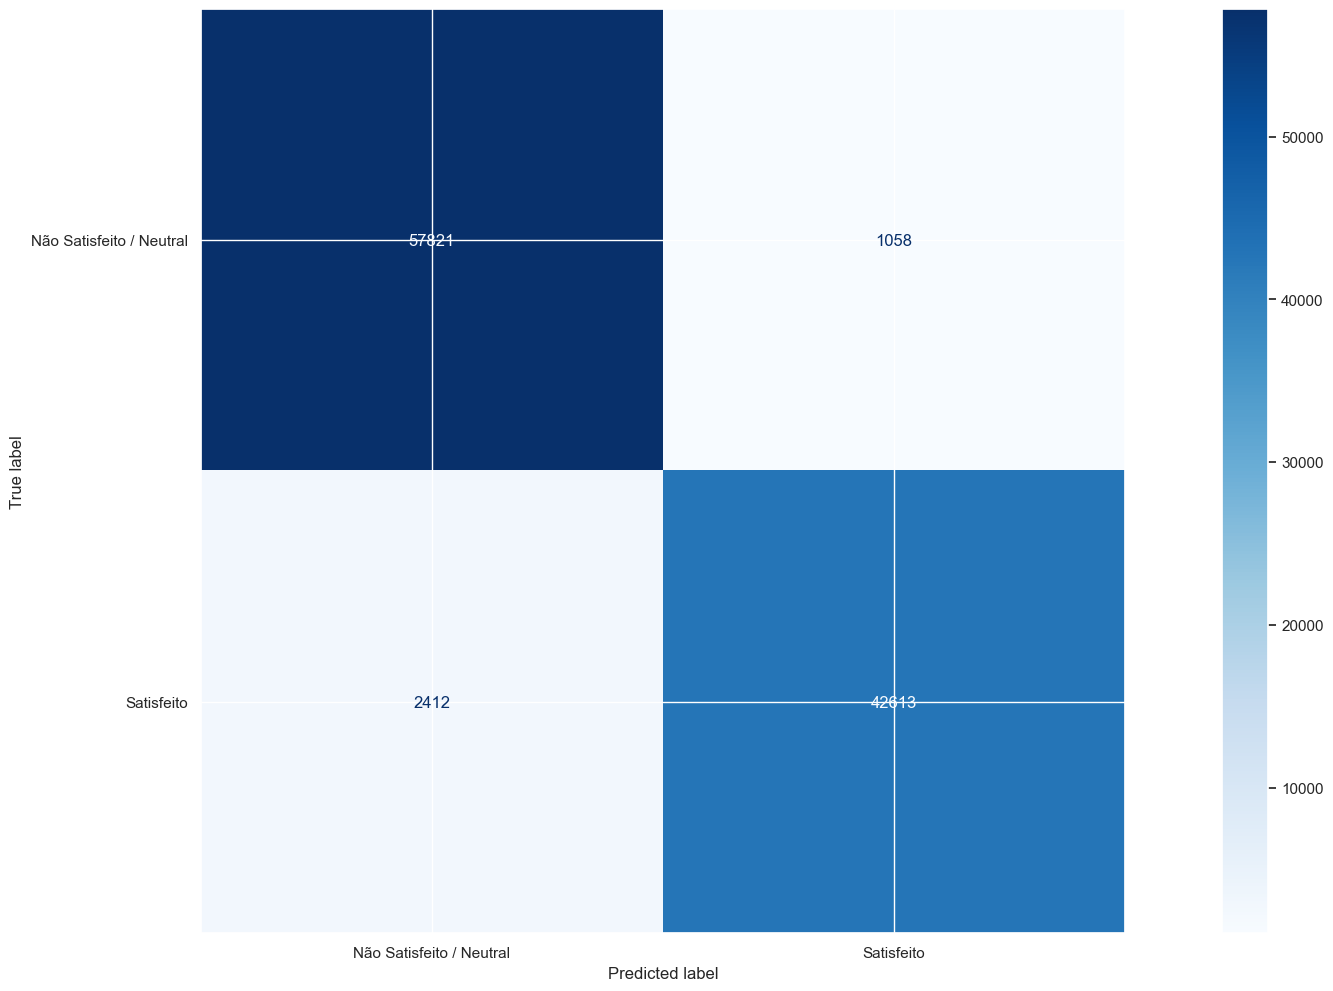

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.98      0.95      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



,value,std
fit_time,1.518547,0.053637
score_time,0.106029,0.013662
test_accuracy,0.966604,0.000978
train_accuracy,0.975841,0.000417
test_precision,0.975774,0.001138
train_precision,0.985542,0.000470
test_recall,0.946430,0.001328
train_recall,0.958306,0.000604
test_f1,0.960877,0.001150
train_f1,0.971733,0.000490


In [46]:
# Treina o modelo com os melhores parametros e cria a matriz de confusão e metricas de avaliacao
lgbm_model = LGBMClassifier(**lgbm_best_params_revised)
lgbm_model.fit(X,y)
lgbm_prob, lgbm_pred = CVS(lgbm_model,X,y)

In [47]:
# Comparação da variavel resposta e valores previstos 
results['lgbm_pred'] = lgbm_pred
results['lgbm_prob'] = lgbm_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob
8420,0,0,0.000642
2906,1,1,0.999515
2662,0,0,0.351049
20451,0,0,0.002436
28726,0,0,0.106339


### <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:100%">Gráficos auxiliares</p></div> 

In [48]:
# Gráfico de como a variação dos hiperametros afeta o desempenho do modelo 
fig = optuna.visualization.plot_slice(study, params=["learning_rate", "max_depth", "num_leaves"])
fig.show()

In [49]:
# Gráfico de historico de otimização dos hiperparametros
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

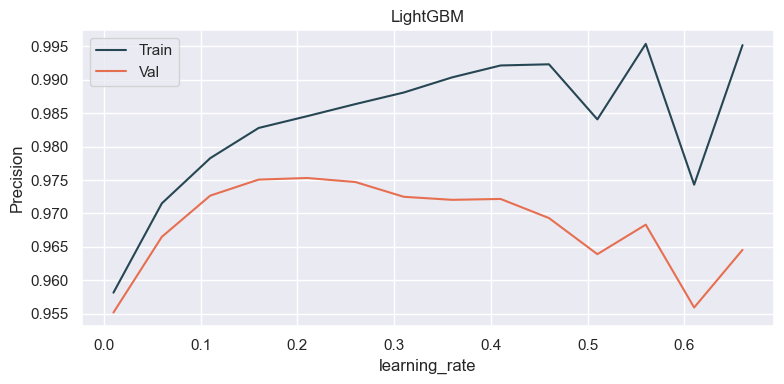

In [50]:
# Gráfico de ajuste fino do learning_rate
param_name = "learning_rate"
param_range = np.arange(0.01, 0.7, 0.05)
fixed_params = lgbm_best_params.copy()

plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val)

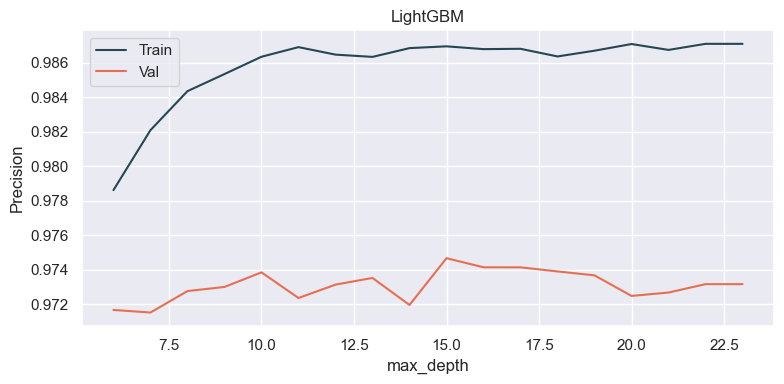

In [51]:
# Gráfico de ajuste fino do max_depth
param_name = "max_depth"
param_range = np.arange(6, 24, 1)
fixed_params = lgbm_best_params.copy()

plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val)

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">LightGBM - Teste</p></div> 

In [52]:
# Faz a classificação dos dados de teste
lgbm_model.fit(X, y)
y_test_lgbm = lgbm_model.predict(X_test)
y_test_lgbm

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
teste['Satisfaction'] = y_test_lgbm

In [54]:
len(teste), len(data_test_raw)

(25976, 25976)

In [55]:
teste['Satisfaction'].value_counts()

Satisfaction
0    14882
1    11094
Name: count, dtype: int64

In [56]:
teste[['id','Satisfaction']].head()

,id,Satisfaction
0,19556,1
1,90035,1
2,12360,0
3,77959,1
4,36875,0


In [79]:
insatisfeitos = teste[teste['Satisfaction'] == 0][['id', 'Satisfaction']]
insatisfeitos.head()


,id,Satisfaction
2,12360,0
4,36875,0
11,115550,0
15,22470,0
16,124915,0


In [81]:
insatisfeitos.to_csv("insatisfeitos_lgbm.csv", index=False)

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">XGBoost</p></div> 

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">XGBoost - Hypertunning</p></div> 

In [58]:
# Função de otimização de hiperametros em conjunto com a biblioteca Optuna
def objective(trial): 
    
    param_grid = {
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),  
        'booster': trial.suggest_categorical('booster', ['gbtree','dart']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['auc']),    
        'max_depth': trial.suggest_int('max_depth', 6, 12),
        #'learning_rate': trial.suggest_categorical('learning_rate', [0.1]),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.25),
        'n_estimators' : trial.suggest_int('n_estimators', 60, 240, step=20),
        'alpha': trial.suggest_float('alpha', 1e-4, 1e-1, log=True),
        'lambda': trial.suggest_float('lambda', 1e-4, 1e-1, log=True),
        'seed': trial.suggest_categorical('seed', [RANDOM_SEED]),     
    }

    model = XGBClassifier(**param_grid)
    number_folds = 3
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=False) #random_state=RANDOM_SEED
    y_pred = cross_val_predict(model, X, y, cv=Kfold)
    
    return f1_score(y,y_pred)

In [59]:
# Executa a função de otimização e retorna a melhor combinação de valor dos hiperparametros apos n_trials
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=5) 

trial = study.best_trial

In [60]:
# Print the result
xgb_best_params = study.best_params
xgb_best_score = study.best_value
print(f"Best score: {xgb_best_score}\n")
print(f"Optimized parameters: {xgb_best_params}\n")

Best score: 0.9587161637858325

Optimized parameters: {'objective': 'binary:logistic', 'booster': 'gbtree', 'eval_metric': 'auc', 'max_depth': 11, 'learning_rate': 0.13065912871286836, 'n_estimators': 220, 'alpha': 0.01360305977043441, 'lambda': 0.0068414758113922, 'seed': 42}



In [61]:
xgb_best_params_revised = {'objective': 'binary:logistic',
 'booster': 'gbtree',
 'eval_metric': 'auc',
 'max_depth': 11,
 'learning_rate': 0.12,
 'n_estimators': 180,
 'alpha': 0.0144,
 'lambda': 0.0022,
 'seed': 42}

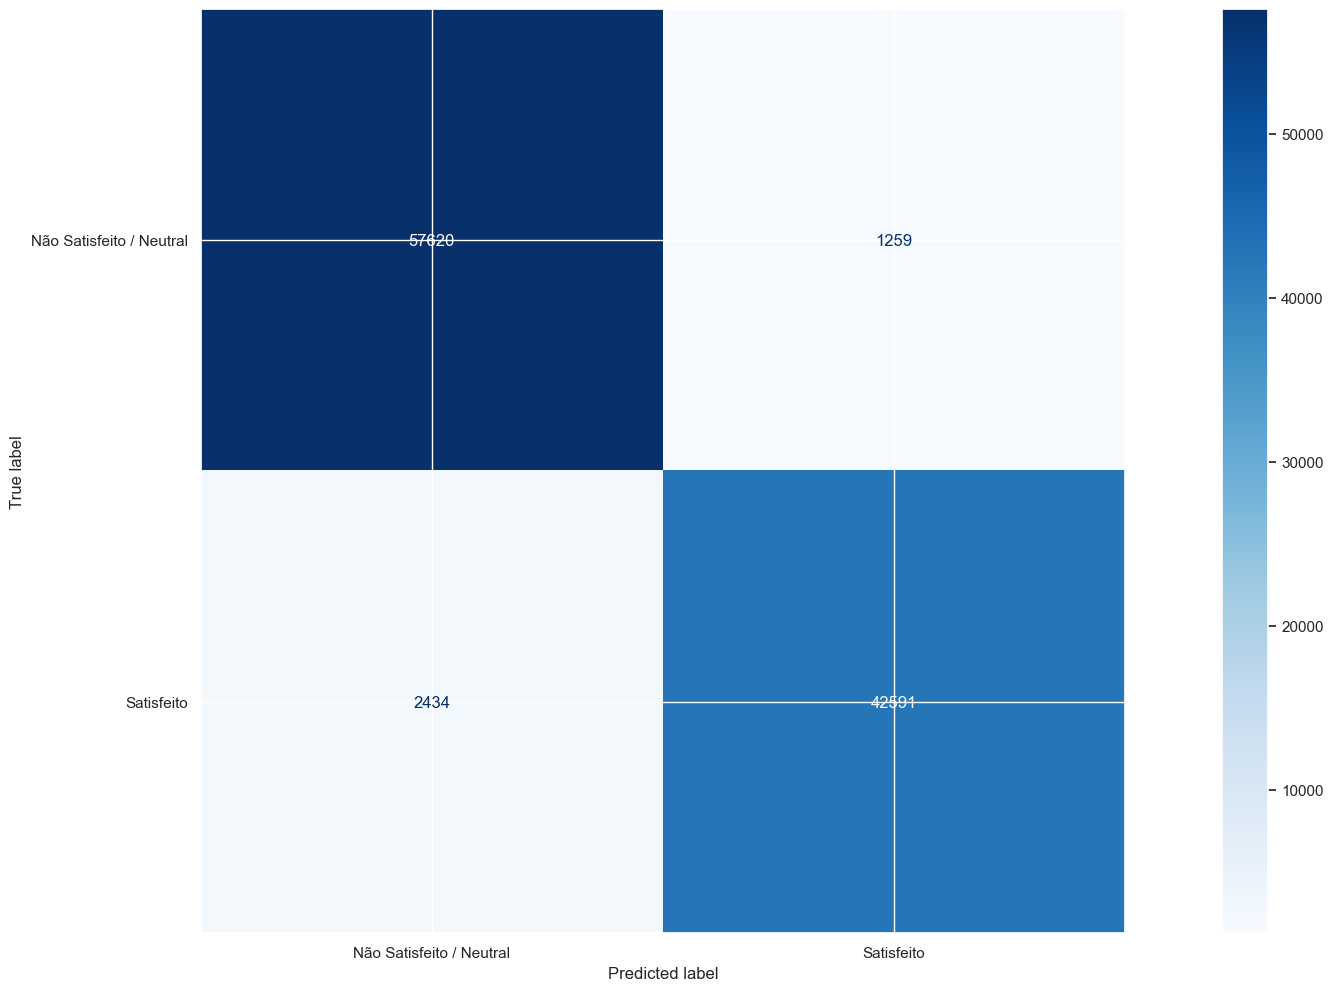

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.97      0.95      0.96     45025

    accuracy                           0.96    103904
   macro avg       0.97      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



,value,std
fit_time,11.361132,4.812820e-01
score_time,0.119430,1.950158e-02
test_accuracy,0.964458,9.673832e-04
train_accuracy,0.999808,8.088155e-05
test_precision,0.971290,1.107687e-03
train_precision,0.999889,3.043367e-05
test_recall,0.945941,2.167484e-03
train_recall,0.999667,1.580261e-04
test_f1,0.958446,1.163563e-03
train_f1,0.999778,9.334918e-05


In [62]:
# Treina o modelo com os melhores parametros e cria a matriz de confusão e metricas de avaliacao
xgb_model = XGBClassifier(**xgb_best_params_revised)
xgb_prob, xgb_pred = CVS(xgb_model,X,y)

In [63]:
# Comparação da variavel resposta e valores previstos 
results['xgb_pred'] = xgb_pred
results['xgb_prob'] = xgb_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob
97051,1,1,0.999335,1,0.999988
14977,1,1,0.999463,1,0.999994
19631,0,0,0.000275,0,0.000009
27514,1,1,0.997945,1,0.999915
73125,1,1,0.999674,1,0.999997


## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Random Forest</p></div>

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Random Forest - Hypertunning</p></div> 

In [64]:
# Função de otimização de hiperametros em conjunto com a biblioteca Optuna
def objective(trial): 
    
    param_grid = {
    'criterion': trial.suggest_categorical('criterion', ['gini','entropy']),      
    'n_estimators': trial.suggest_int('n_estimators', 60, 180, step=20),
    'max_depth': trial.suggest_int('max_depth', 8, 18),
    'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
    'random_state': RANDOM_SEED,
}

    model = RandomForestClassifier(**param_grid)

    number_folds = 3
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=False)
    y_pred = cross_val_predict(model, X, y, cv=Kfold)
    
    return f1_score(y,y_pred)

In [65]:
# Executa a função de otimização e retorna a melhor combinação de valor dos hiperparametros apos n_trials
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=5);

trial = study.best_trial

In [66]:
# Print the result
rf_best_params = study.best_params
rf_best_score = study.best_value
print(f"Best score: {rf_best_score}\n")
print(f"Optimized parameters: {rf_best_params}\n")

Best score: 0.9540036381303173

Optimized parameters: {'criterion': 'entropy', 'n_estimators': 100, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 3}



In [67]:
rf_best_params_revised = {'criterion': 'entropy',
 'n_estimators': 100,
 'max_depth': 17,
 'min_samples_split': 5,
 'min_samples_leaf': 1}

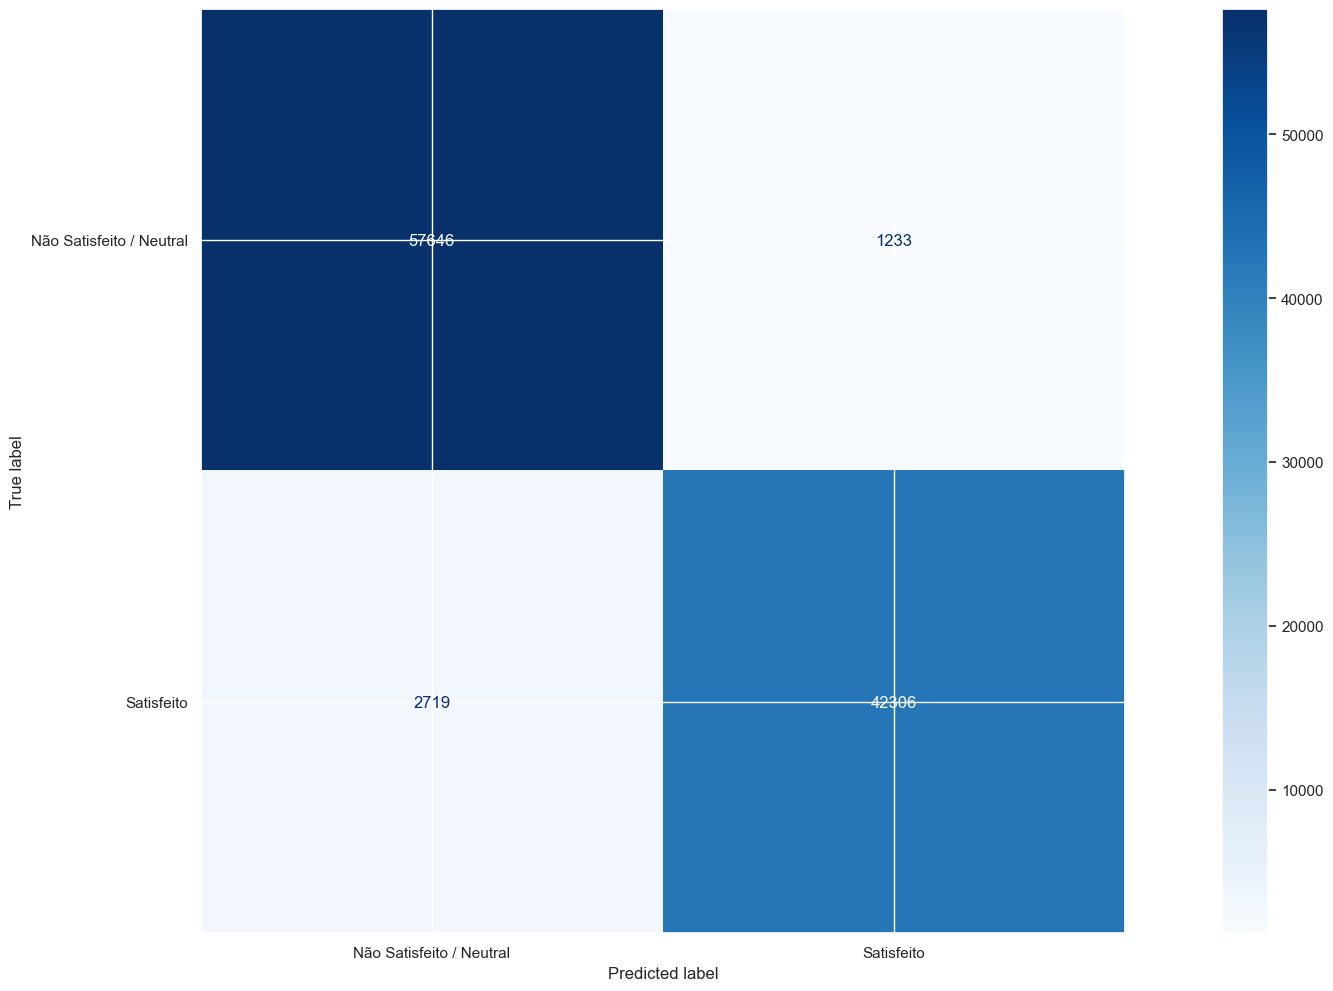

Score: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     58879
           1       0.97      0.94      0.96     45025

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



,value,std
fit_time,15.010960,0.343749
score_time,0.674811,0.021351
test_accuracy,0.961638,0.001352
train_accuracy,0.982715,0.000382
test_precision,0.971877,0.001458
train_precision,0.990765,0.000501
test_recall,0.938634,0.002563
train_recall,0.969145,0.000682
test_f1,0.954964,0.001620
train_f1,0.979835,0.000449


In [68]:
# Treina o modelo com os melhores parametros e cria a matriz de confusão e metricas de avaliacao
rf_model = RandomForestClassifier(**rf_best_params_revised)
rf_model.fit(X,y)
rf_prob, rf_pred = CVS(rf_model,X,y)

In [69]:
# Comparação da variavel resposta e valores previstos 
results['rf_pred'] = rf_pred
results['rf_prob'] = rf_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob,rf_pred,rf_prob
13614,0,0,0.009850,0,0.000191,0,0.026630
19346,0,0,0.000614,0,0.000064,0,0.042847
38168,1,1,0.994440,1,0.999674,1,0.889394
48428,0,0,0.015058,0,0.003848,0,0.026802
23102,0,0,0.001116,0,0.000181,0,0.001806


## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Voting Classifier</p></div>

In [70]:
# Cria o classificador de votcao utilizando os resultado dos modelos anteriores.
# O parametro "soft" leva em consideracao a media ponderada das probabilidades de cada classe, em vez de apenas o voto em si.
voting = VotingClassifier(estimators=[('LightGBM', lgbm_model), 
                                      ('XGBoost', xgb_model),
                                      ('RandomForest', rf_model)],                          
                                      voting='soft')

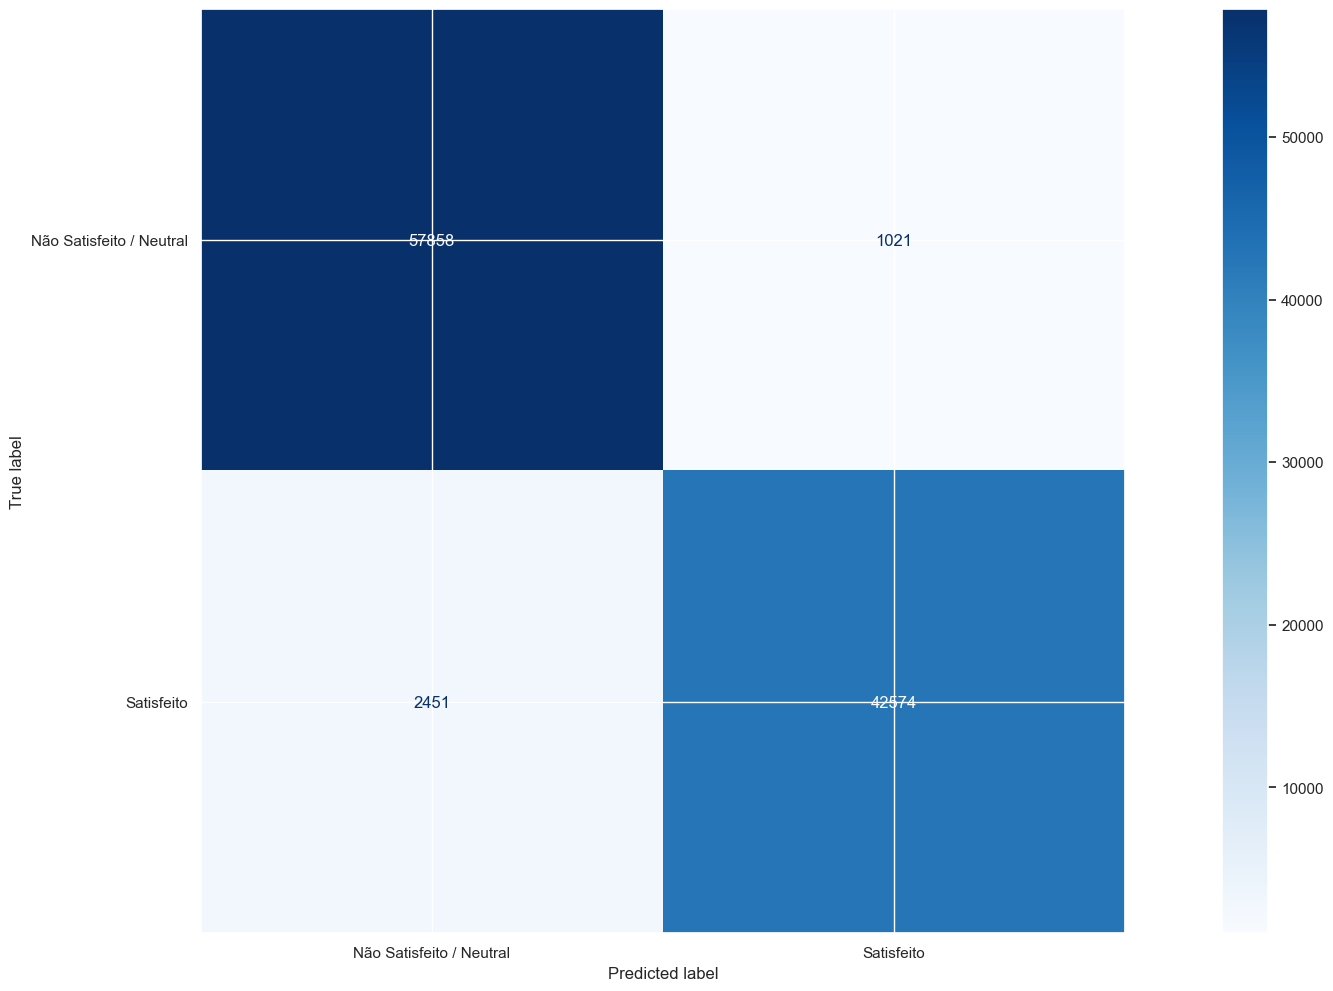

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.98      0.95      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



,value,std
fit_time,26.977315,0.401238
score_time,0.852004,0.030387
test_accuracy,0.966710,0.000731
train_accuracy,0.992991,0.000444
test_precision,0.976675,0.000548
train_precision,0.997027,0.000227
test_recall,0.945763,0.002039
train_recall,0.986768,0.000939
test_f1,0.960969,0.000902
train_f1,0.991871,0.000518


In [71]:
# Treina o modelo com os melhores parametros e cria a matriz de confusão e metricas de avaliacao
voting.fit(X,y)
voting_prob, voting_pred = CVS(voting,X,y)

In [72]:
# Comparação da variavel resposta e valores previstos 
results['voting_pred'] = voting_pred
results['voting_prob'] = voting_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob,rf_pred,rf_prob,voting_pred,voting_prob
83326,1,1,0.997807,1,0.999875,1,0.982031,1,0.991303
71073,1,1,0.997109,1,0.999335,1,0.991479,1,0.996273
24482,1,1,0.999209,1,0.999980,1,0.999951,1,0.999729
98073,0,0,0.006342,0,0.000617,0,0.004556,0,0.003039
54005,1,1,0.964221,1,0.988885,1,0.751553,1,0.893656


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Resultado Financeiro</p></div> 

# Negócio

*"<u>Melhoria da satisfação do cliente:</u> Ao identificar os clientes insatisfeitos ou neutros, o time de atendimento poderá entrar em contato com eles de forma personalizada para entender suas preocupações e buscar soluções. Isso pode levar a um aumento da satisfação do cliente, reduzindo as reclamações e melhorando a imagem da empresa."*

Por exemplo, em um cenário em que a empresa gastou R$ 1000.000,00 em campanhas de marketing para reativar clientes insatisfeitos e enviou cupons de desconto para 50000 clientes, o cálculo seria:

Custo de cupom por cliente: 1000.000,00 / 50000 = 20,00 reais de desconto por cupom.


# Comparativo Financeiro
Comparação da efetividade da campanha utilizando de reativação por cupons de desconto, comparando o modelo de classificação treinado com uma escolha aleatória sem utilização do modelo, a qual leva em consideração que a porcentagem de chance do cliente ser insatisfeito é a mesma da distribuição de clientes 'neutro/insatisfeito' nos dados de treino.

### Precisão x Amostras = Acertos


**Nosso Modelo:**  0.95127 * 25976 ≈ 24710<br>
**Modelo Atual da Empresa:** 0.57 * 25976 ≈ 14806

**Diferença acertos dos Modelos:** 24710 - 14806 = 9904<br>
**Diferença percentual dos Modelos:** 9904 / 25976 * 100 = 38,13%<br>

## Resultado financeiro

**Modelo treinado de Classificação:** Apresenta uma economia em Marketing de reativação de aproximandamente R$ 381.300,00. Uma vez que direciona a campanha para os clientes insatisfeito com alto grau de precisão, evitando que a promoção seja direciona para público ja satisfeito com a marca.

Deste modo, este valor pode ser reinvestido em outras áreas da empresa ou na própria campanha, a fim de ampliar seu alcance e atingindo mais clientes.  <br>


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: left;margin:0;font-size:120%">Considerações Finais</p></div>

- O modelo de machine learnining não é a etapa final do processo, o objetivo final é entender a insatisfação do e propor soluções.

### MELHOR CODIGO
**Melhor Estratégia:**

<u>Preprocessing:</u> 'Delivery delay in minutes' = 'Carrier delay in minutes' se NaN<br>
<u>Encoding:</u> Intuitivo<br>
<u>Transformação Logaritimica (Robust Scaler):</u> 'Delivery delay in minutes','Carrier delay in minutes' <br>
<u>LightGBM:</u> {'objective': 'binary',
 'boosting_type': 'dart',
 'num_leaves': 80,
 'max_depth': 15,
 'learning_rate': 0.1978445886831706,
 'reg_alpha': 0.01448840584544802,
 'reg_lambda': 0.006262263425279142,
 'boost_from_average': False,
 'seed': 42}